<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project : E-commerce in Brazil </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

### **Prepared by:** Eduardo Melo

# E-commerce Capstone project

**Abstract:**
- This dataset comes from kaggle.com and it is related to e-commerce sales in Brazil. 
- We had three objectives in this project:
    - the first was to determine the possibility of predicting the review score a consumer would give to a product based on the product features and delays related to the delivery time. 
    - The second was to verify if the review comment consumers give after they receive a product had a strong correlation with the review score and therefore could accurately predict the review score. 
    - Our third objective was to cluster customer/sales with different features to  provide insights on sales perfomance. 
- We concluded that although it is possible to reach a certain accuracy/precision/recall using the products and delivery times, the best model performances came while using sentiment analysis (as part of our second objective), indicating that low scores are not only related to delivery delay problems, but also, with product quality issues and promises made at the e-commerce website. 
- Finally, regarding our third objective, we found out that most product categories have very similar performances while others outperform in sales during some specific times of the year, specially at days like Black Friday. 

**Summary:**
- This project is divided in three chapters, each properly identified within this jupyter notebook. Each of the chapters represents one of the main goals of this capstone. In order of appearence, the chapters/goals are:
    - 1. Predict the review score of order items based on the product features (weight, size) and delivery related numbers.
    - 2. Predict the review score based on the words used in the review of that product to:
        - A. verify the relationship and strenght of predictions based on review text data.
        - B. In case of high Precision/Recall values, identify main words related to good and bad scores, in order to identify main reasons behind poor product performance and enable corrective actions.
    - 3. Identify clusters that have distinct performances to help understand sales performance throughout the year.
- Each chapter is described thoroughly in its own respective section.

## Chapter 1 - Predicting review scores based on product features and delivery related numbers

- **Summary:** In this chapter we use product specifications delivery time as features to predict the review score of each order.

### This chapter is divided in the following steps:

#### 0. Importing libraries and files

#### 1. Exploratory Data Analysis

#### 2. Feature engineering and Data preprocessing

#### 3. Evaluating and defining best models

#### 4. Conclusions

### 0.Importing libraries and files

**Approach:**
- Import the most frequently libraries used troughout this capstone.
- Import the files related to this dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import dateutil.parser
import seaborn as sns
import plotly
#import plotly.plotly as py
from plotly import offline as pyo
import plotly.graph_objs as go

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [2]:
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
customers=pd.read_csv('data/olist_customers_dataset.csv')
geo=pd.read_csv('data/olist_geolocation_dataset.csv')
items=pd.read_csv('data/olist_order_items_dataset.csv')
payments=pd.read_csv('data/olist_order_payments_dataset.csv')
reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')
orders=pd.read_csv('data/olist_orders_dataset.csv')
products=pd.read_csv('data/olist_products_dataset.csv')
sellers=pd.read_csv('data/olist_sellers_dataset.csv')
translation=pd.read_csv('data/product_category_name_translation.csv')

##### File interaction (obtained from Kaggle.com)

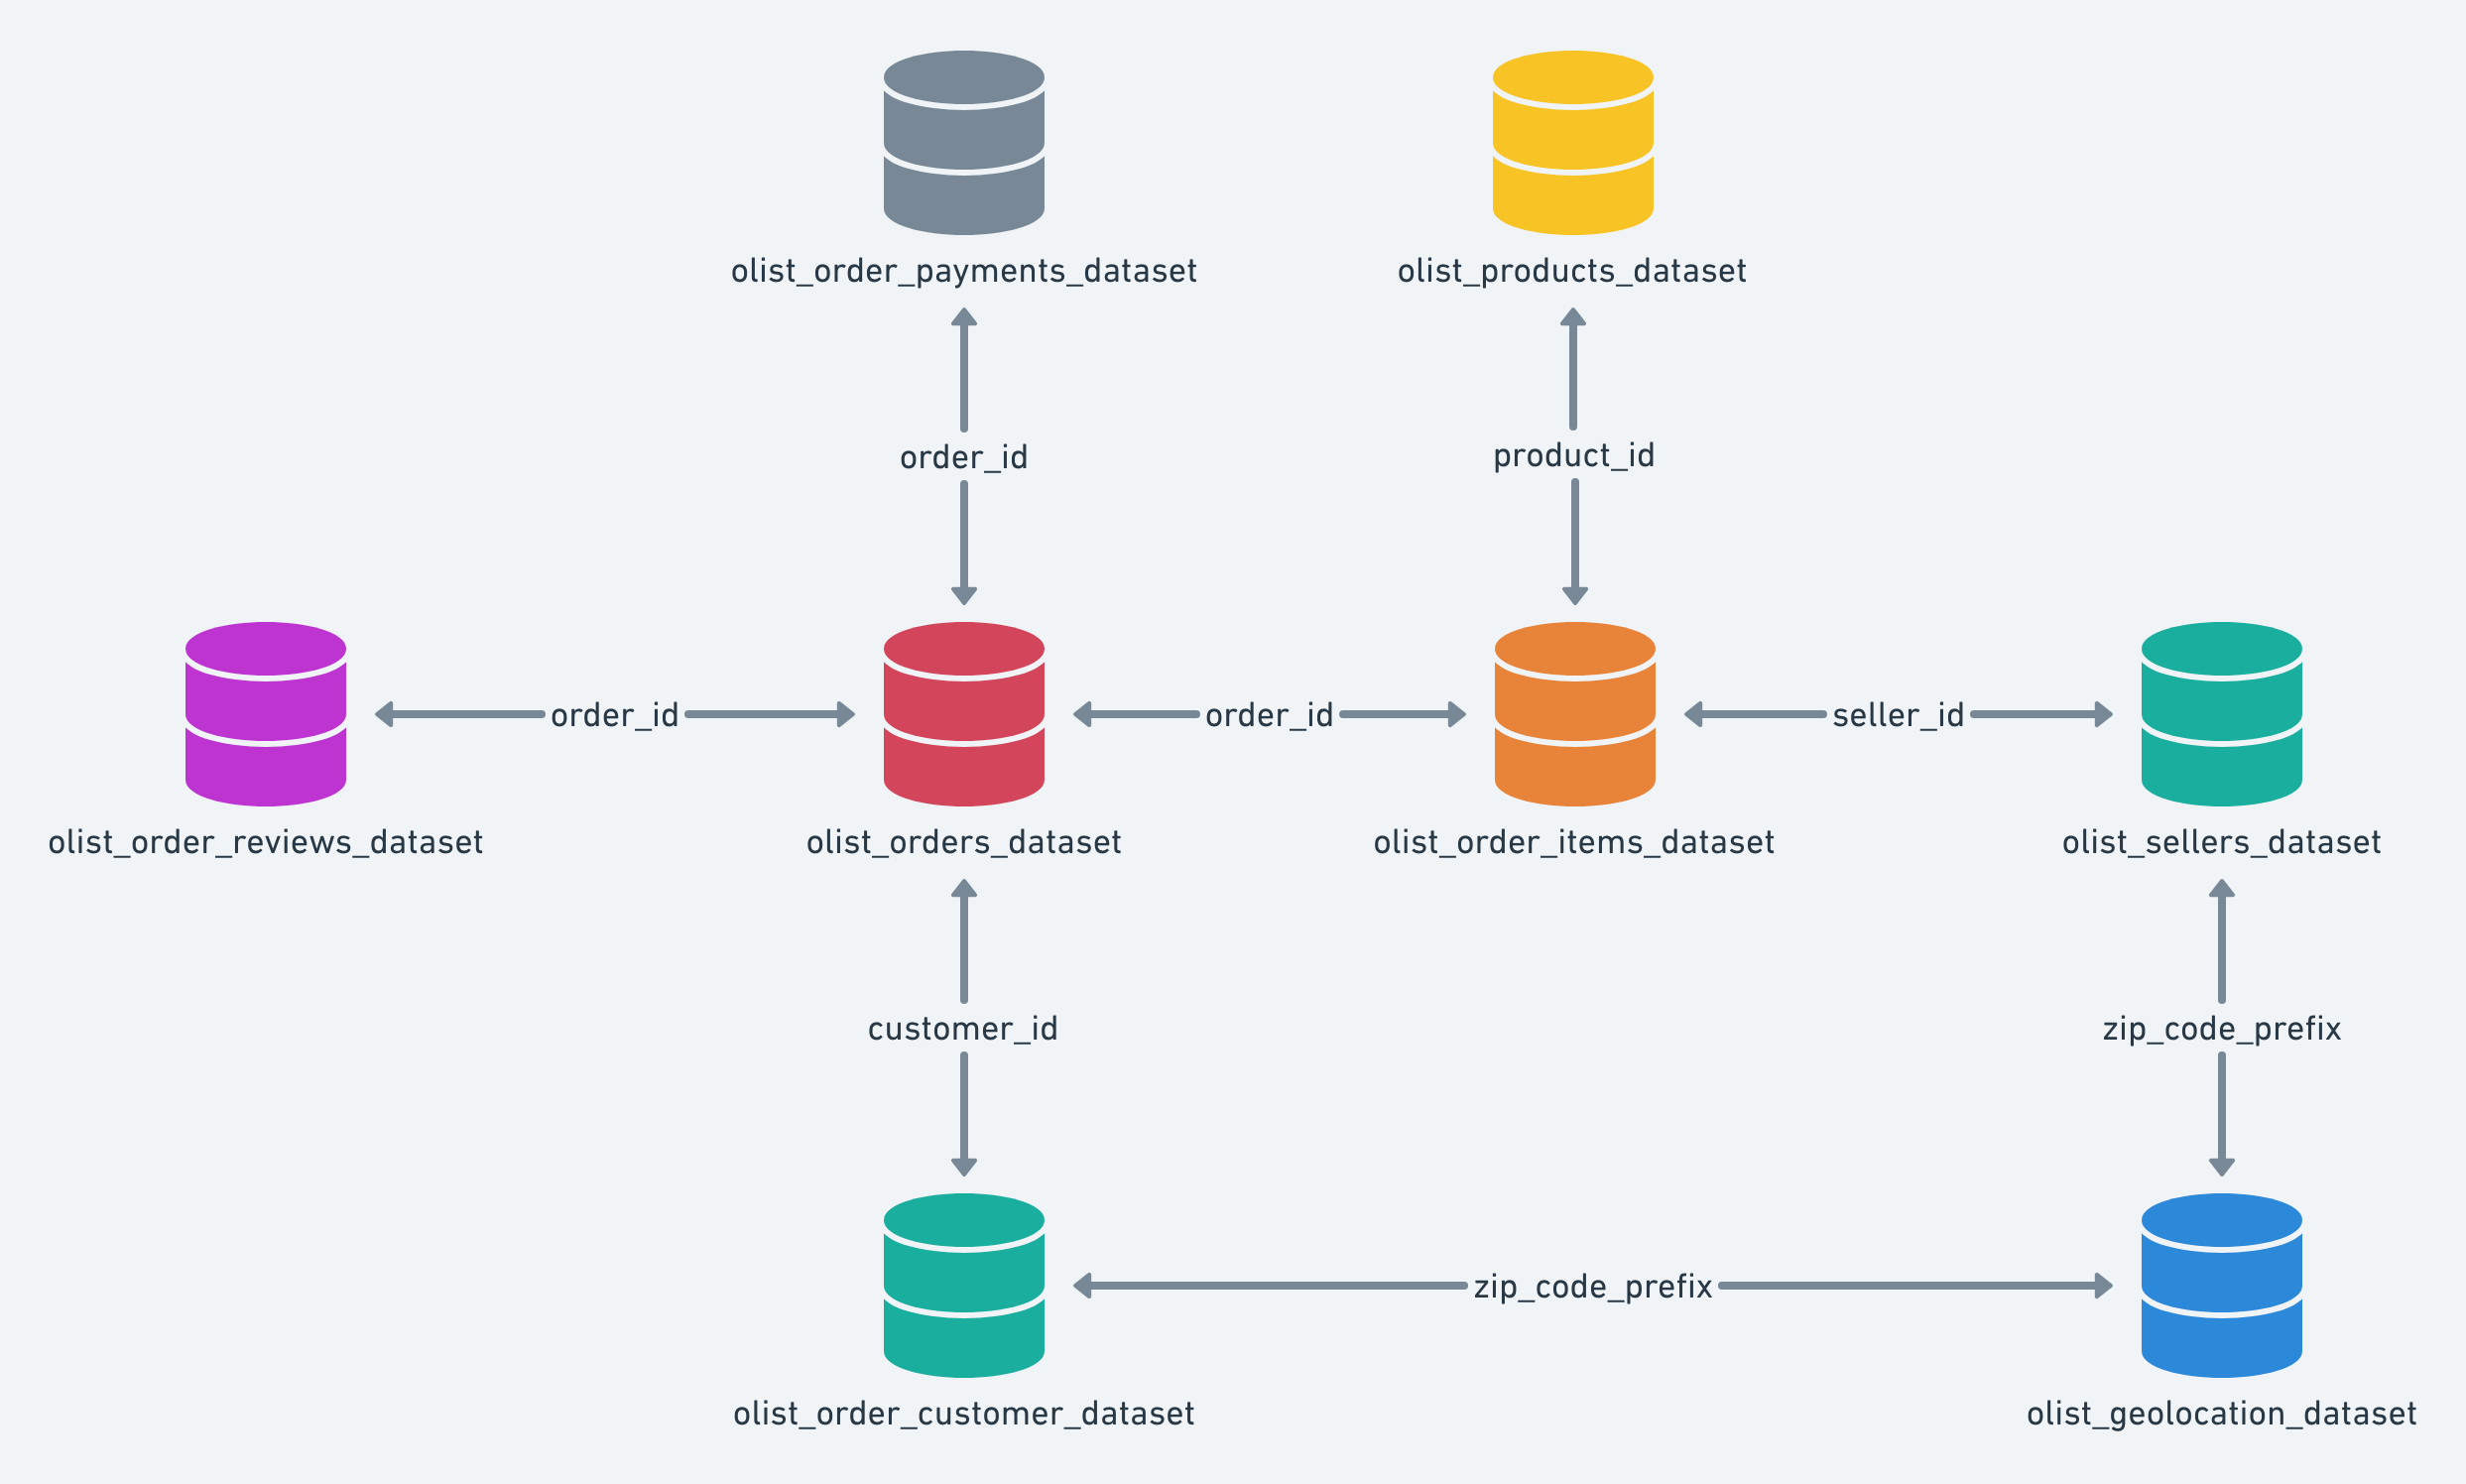

### 1. Exploratory Data Analysis

**Approach:**
- Visualize each file structure.
- Quantify the number of missing values within each file.
- Visualize some information to better understand the dataset.
- Breakdown datetime information into Hour, Day, Month, Year.

**Objective:**
- Determine the data inside each of the files to understand what could be useful.
- Define the need for data cleaning
- Visualize data distribution.
- Provide more information for better model calibration.


In [4]:
# Visualing the content of the file
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
# Identifying and quantifying the number of missing values in each of the files
print('geolocation')
print(geo.isnull().sum())
print("")
print('customers')
print(customers.isnull().sum())
print("")
print('items')
print(items.isnull().sum())
print("")
print('payments')
print(payments.isnull().sum())
print("")
print('reviews')
print(reviews.isnull().sum())
print("")
print('orders')
print(orders.isnull().sum())
print("")
print('products')
print(products.isnull().sum())
print("")
print('sellers')
print(sellers.isnull().sum())

geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

customers
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

orders
order_id                   

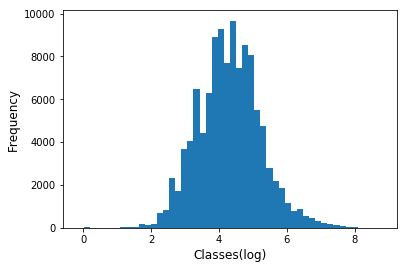

In [6]:
#plotting the distribution of the log of prices 
plt.hist(np.log(items['price']), bins=50)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Classes(log)', fontsize=12)
plt.savefig('Price_distribution')
plt.show();

In [7]:
orders['order_purchase_date'], orders['order_purchase_hour'] = orders['order_purchase_timestamp'].str.split(' ', 1).str

In [8]:
#Feature engineering, creating total delivery time, in number of days
from datetime import datetime
from datetime import timedelta

orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
# Product should be delivered first to carrier then to customer, whenever that does not happen we discard the row.
orders['order_delivery_checking']=(orders['order_delivered_customer_date']-orders['order_delivered_carrier_date']).astype('timedelta64[h]')/24
orders['order_delivery_time']=(orders['order_delivered_customer_date']-orders['order_estimated_delivery_date']).astype('timedelta64[h]')/24
orders['Order_buy_receive_window']=(orders['order_delivered_customer_date']-orders['order_purchase_timestamp']).astype('timedelta64[h]')/24

In [9]:
# Visualing the content of the file
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,10:56:33,6.041667,-7.125,8.416667
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,20:41:37,12.000000,-5.375,13.750000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,08:38:49,9.166667,-17.250,9.375000


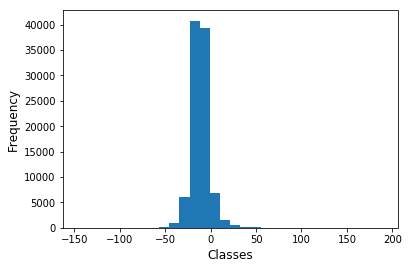

Mean:  -11.200473865693642
Median:  -11.958333333333334
Min:  -146.04166666666666
Max:  188.95833333333334


In [10]:
#Histogram with the frequency of each delivery time

plt.hist(orders['order_delivery_time'], bins=30)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Classes', fontsize=12)

plt.show();
print('Mean: ',orders['order_delivery_time'].mean())
print('Median: ',orders['order_delivery_time'].median())
print('Min: ',orders['order_delivery_time'].min())
print('Max: ',orders['order_delivery_time'].max())

In [13]:
# Visualing the content of the file
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [14]:
# Visualing the content of the file
reviews.head(n=3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [16]:
# Visualing the content of the file
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [17]:
# Visualing the content of the file
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##### Comment for next cell: 
- Drop all rows in which the delivery date (when product arrived at customer) precedes the carrier date (when product arrived at the carrier company) 

In [11]:
#Droping rows with negative delivery time 
indexOrders=orders[orders['order_delivery_checking']<0].index
orders.drop(indexOrders , inplace=True)
orders.shape

(99418, 13)

In [12]:
#Droping rows with missing values
NaN_orders=orders[orders.isna().any(axis=1)].index
orders.drop(NaN_orders , inplace=True)
orders.shape

(96438, 13)

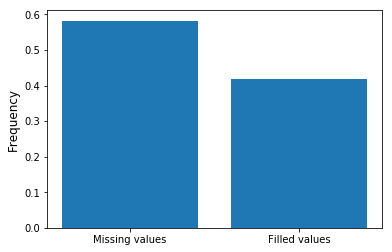

In [15]:
#Verifying the number of rows with and without a review comment message (required at chapter 3)

a=reviews['review_comment_message'].isnull().sum()
b=reviews['review_comment_message'].notnull().sum()
c=a/(a+b)
d=b/(a+b)
plt.bar(x=['Missing values','Filled values'], height=[c,d])
plt.ylabel('Frequency', fontsize=12)
plt.savefig('Sentiment_plot')
plt.show();

##### Merging dataframes into a single dataframe, step by step

In [18]:
concat1=pd.merge(right=orders,left=reviews,how='inner', right_on='order_id', left_on='order_id')
print(orders.shape)
print(reviews.shape)
concat1.shape

(96438, 13)
(100000, 7)


(96975, 19)

In [20]:
concat2=pd.merge(right=concat1, left=payments, how='inner', right_on='order_id',left_on='order_id')
print('concat1 shape, (rows,col): ',concat1.shape)
print('payments shape, (rows,col): ',payments.shape)
print('concat2 shape, (rows,col): ',concat2.shape)
concat2.head(3)

concat1 shape, (rows,col):  (96975, 19)
payments shape, (rows,col):  (103886, 5)
concat2 shape, (rows,col):  (101290, 23)


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,...,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018-04-25,22:01:49,7.083333,-12.291667,13.791667
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,...,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018-06-26,11:01:38,1.250000,-16.166667,3.375000
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,...,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017-12-12,11:19:55,2.875000,-16.291667,6.250000


In [21]:
geo=pd.DataFrame(geo.groupby('geolocation_zip_code_prefix', as_index=False).mean())

In [22]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [23]:
concat3=pd.merge(left=customers, right=geo, how='inner', left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

concat3.rename(columns={'geolocation_lng':'customer_lng','geolocation_lat':'customer_lat'}, inplace=True)
concat3=concat3.drop(['geolocation_zip_code_prefix'], axis=1)
print('customers shape, (rows,col): ',customers.shape)
print('geo shape, (rows,col): ',geo.shape)
print('concat3 shape, (rows,col): ',concat3.shape)
concat3.columns

customers shape, (rows,col):  (99441, 5)
geo shape, (rows,col):  (19015, 3)
concat3 shape, (rows,col):  (99163, 7)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'customer_lat', 'customer_lng'],
      dtype='object')

In [24]:
concat4=pd.merge(concat2, concat3)
print('concat2 shape, (rows,col): ',concat2.shape)
print('concat4 shape, (rows,col): ',concat3.shape)
print('concat4 shape, (rows,col): ',concat4.shape)
concat4.head(5)

concat2 shape, (rows,col):  (101290, 23)
concat4 shape, (rows,col):  (99163, 7)
concat4 shape, (rows,col):  (101015, 29)


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,...,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,...,22:01:49,7.083333,-12.291667,13.791667,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,-17.858065,-41.495279
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,...,11:01:38,1.250000,-16.166667,3.375000,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,-23.471749,-46.636773
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,...,11:19:55,2.875000,-16.291667,6.250000,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,-23.457636,-46.656681
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,...,12:04:06,13.208333,-13.958333,14.541667,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,-21.741553,-43.335326
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,...,12:04:06,13.208333,-13.958333,14.541667,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,-21.741553,-43.335326


In [25]:
concat5=pd.merge(concat4, items)
print('concat4 shape, (rows,col): ',concat4.shape)
print('items shape, (rows,col): ',items.shape)
print('concat5 shape, (rows,col): ',concat5.shape)

concat4 shape, (rows,col):  (101015, 29)
items shape, (rows,col):  (112650, 7)
concat5 shape, (rows,col):  (115349, 35)


In [26]:
concat6=pd.merge(concat5, products, left_on='product_id', right_on='product_id')

print('concat6 shape, (rows,col): ',concat6.shape)

concat6 shape, (rows,col):  (115349, 43)


In [27]:
concat7=pd.merge(sellers,geo, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix' )
print('concat7 shape, (rows,col): ',concat7.shape)

concat7 shape, (rows,col):  (3088, 7)


In [28]:
concat8=pd.merge(concat6, concat7, left_on='seller_id', right_on='seller_id')
concat8.rename(columns={'geolocation_lng':'seller_lng','geolocation_lat':'seller_lat'}, inplace=True)
concat8=concat8.drop(['geolocation_zip_code_prefix'], axis=1)

print('concat8 shape, (rows,col): ',concat8.shape)

concat8 shape, (rows,col):  (115089, 48)


In [29]:
df=pd.merge(concat8,translation)
df=df.drop(['product_category_name'], axis=1)
print('concat8 shape, (rows,col): ',concat8.shape)
print('translation shape, (rows,col): ',translation.shape)
print('df shape, (rows,col): ',df.shape)


concat8 shape, (rows,col):  (115089, 48)
translation shape, (rows,col):  (71, 2)
df shape, (rows,col):  (113436, 48)


In [31]:
df.groupby(df['product_category_name_english']).sum().head(5)

,payment_sequential,payment_installments,payment_value,review_score,order_delivery_checking,order_delivery_time,Order_buy_receive_window,customer_zip_code_prefix,customer_lat,customer_lng,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_lat,seller_lng
product_category_name_english,,,,,,,,,,,,,,,,,,,,,
agro_industry_and_commerce,488,722,115632.24,1040,2000.375000,-3064.750000,2927.125000,7555816,-5219.685482,-11329.489793,...,10965.0,195991.0,543.0,1060774.0,7590.0,6562.0,5611.0,12073885,-6062.735274,-11866.101883
air_conditioning,299,860,88849.72,1176,2356.458333,-3960.041667,3614.666667,8715049,-6424.329102,-13604.072925,...,15003.0,312347.0,696.0,1198122.0,11382.0,6227.0,7679.0,9717163,-6770.177739,-14138.095371
art,219,415,28498.45,839,1506.500000,-2530.416667,2318.291667,6403564,-4403.452952,-9580.409790,...,9986.0,202154.0,400.0,317174.0,10329.0,1617.0,7651.0,4536224,-4832.399661,-9790.971949
arts_and_craftmanship,24,42,2326.17,99,85.500000,-146.708333,136.833333,552696,-536.258502,-1111.607646,...,1123.0,19013.0,89.0,32877.0,742.0,262.0,517.0,425742,-567.181805,-1128.079444
audio,400,980,60214.87,1447,3895.833333,-3602.125000,5017.166667,12996489,-7985.334075,-17314.320034,...,16940.0,296609.0,699.0,460985.0,7544.0,3574.0,5822.0,4305620,-8509.280769,-17790.323011


In [32]:
df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_purchase_date',
       'order_purchase_hour', 'order_delivery_checking', 'order_delivery_time',
       'Order_buy_receive_window', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'sell

## 2. Feature engineering and data preprocessing (Part 1)

**Approach:**
- Slicing the order_purchase_hour to keep only the hour value (exclude minutes and seconds)
- Slicing the order_puchase_date column to create a new column: order_purchase_year
- Slicing the order_puchase_date column to create a new column: order_purchase_month
- Slicing the order_puchase_date column to create a new column: order_purchase_day
- Afterwards, drop the original column, order_purchase_date.
- Dropping 30 columns, not required for model calibration.
- Prepared some data visualization to understand the contents of the new dataframe.
- Checked the correlation between the Y variable(review_score) and the features.
- Converting Y variable results into a binary classification by:
    - turning 1 and 2 into 0's
    - turning 4 and 5 into 1's
    - dropping 3 as it is neutral and hard to be determined.

In [33]:
df['order_purchase_hour']=df['order_purchase_hour'].str[:2]
df['order_purchase_hour']=df['order_purchase_hour'].astype(int)

In [34]:
df['order_purchase_year']=df['order_purchase_date'].str[:4]
df['order_purchase_year'] = df['order_purchase_year'].astype(int)
df['order_purchase_day']=df['order_purchase_date'].str[-2:]
df['order_purchase_day'] = df['order_purchase_day'].astype(int)
df['order_purchase_month']=df['order_purchase_date'].str[-5:-3]
df['order_purchase_month'] = df['order_purchase_month'].astype(int)


In [35]:
df=df.drop(['order_purchase_date'],axis=1)

In [36]:
df=df.drop(['order_id','review_id','customer_id','customer_lat','customer_lng','customer_unique_id','customer_zip_code_prefix','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date', 'order_id','order_item_id', 'review_answer_timestamp','review_comment_message', 'review_comment_title', 'review_creation_date','review_id','seller_lat','seller_lng','seller_zip_code_prefix','shipping_limit_date','customer_city', 'customer_state','product_id','customer_city','seller_city','seller_id','customer_state','seller_state'], axis=1)

In [37]:
df=df.drop(['order_purchase_timestamp'], axis=1)

In [38]:
# creating an aggregation
avg_score_per_category = df.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean', 'min', 'max']})
avg_score_per_category.columns = ['product_category_name_english', 'count', 'mean', 'min', 'max']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 50]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category.head(3)

,product_category_name_english,count,mean,min,max
9,books_imported,59,4.525424,1,5
8,books_general_interest,547,4.493601,1,5
64,small_appliances_home_oven_and_coffee,75,4.453333,1,5


In [39]:
categories=list(avg_score_per_category[avg_score_per_category['count'] > 50].loc[:,'product_category_name_english'])

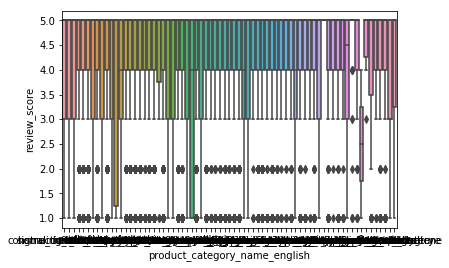

In [40]:
import seaborn as sn

sn.boxplot(x=df['product_category_name_english'], y=df['review_score'])

In [41]:
df.corrwith(df['review_score'], axis = 0)

payment_sequential            0.006158
payment_installments         -0.042933
payment_value                -0.083567
review_score                  1.000000
order_purchase_hour           0.011902
order_delivery_checking      -0.270258
order_delivery_time          -0.229798
Order_buy_receive_window     -0.305277
price                         0.002097
freight_value                -0.034557
product_name_lenght          -0.013166
product_description_lenght    0.013703
product_photos_qty            0.021796
product_weight_g             -0.027693
product_length_cm            -0.020792
product_height_cm            -0.023716
product_width_cm             -0.012354
order_purchase_year          -0.014710
order_purchase_day           -0.000159
order_purchase_month          0.027835
dtype: float64

In [42]:
df.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'order_status', 'order_purchase_hour',
       'order_delivery_checking', 'order_delivery_time',
       'Order_buy_receive_window', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_purchase_year',
       'order_purchase_day', 'order_purchase_month'],
      dtype='object')

In [43]:
df = df.reindex(columns=['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_status', 'order_purchase_hour',
       'order_delivery_checking', 'order_delivery_time',
       'Order_buy_receive_window', 'customer_city', 'customer_state',
       'product_id', 'seller_id', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_city', 'seller_state',
       'product_category_name_english', 'order_purchase_year',
       'order_purchase_day', 'order_purchase_month',
       'order_purchase_month_year','review_score'])

In [44]:
for i in range(df.shape[0]):
    if df.loc[i, 'review_score']<3:
        df.loc[i, 'review_score']=0
    elif df.loc[i, 'review_score']>3:
        df.loc[i, 'review_score']=1
    else:
        df.drop(i, inplace = True)
    if i%25000 == 0:
        print(i)

0
25000
50000
75000
100000


In [45]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## 2. Feature engineering and data preprocessing (Part 2)

**Approach:**
- Identified values to be used as features(X) and as the dependent variable(y)
- Data is imbalanced, therefore we proceeded and undersampled part of the majority class(1).
- Verified the result of undersampling (length of both classes)
- Created dummy variables for two categorical variables: payment_type and product_category_name_english
- Merged y and X into a single dataframe.
- Created a dummy variables for one more feature and dropped other seven features.

In [46]:
# Split into features and target
y = df.loc[:, 'review_score']
X = df.drop('review_score', axis=1)

#### Undersampling the majority class (1) to have same size as minority class (0)

In [47]:
#Filtering good and bad scores
bad_scores=pd.DataFrame(y[y==0])
good_scores=pd.DataFrame(y[y==1])

#Random sampling good score rows to the lenght of bad scores 
good_scores_sample=good_scores.sample(len(bad_scores), random_state=12)
good_scores_sample.size

17189

In [48]:
len(bad_scores)

17189

In [49]:
type(good_scores_sample)
good_scores_sample.head(2)

,review_score
95725,1
94440,1


In [50]:
y=pd.DataFrame(y)

In [51]:
#merging good and bad score as a single list

y=good_scores_sample.append(bad_scores)
y.shape

(34378, 1)

In [52]:
type(list(y.index))

list

#### Selecting the corresponding X values for the undersampled y values

In [53]:
#Select the rows for X values corresponding to the y variables rows
X=X.loc[y.index, :]
X.shape

(34378, 29)

In [54]:
X.reset_index()[:3]

,index,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,...,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,product_category_name_english,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year
0,95725,1,credit_card,7,171.63,delivered,12,6.708333,-9.833333,8.625000,...,16.0,11.0,11.0,NaN,NaN,watches_gifts,2017,11,3,NaN
1,94440,1,credit_card,2,56.78,delivered,22,1.750000,-5.500000,4.541667,...,16.0,2.0,20.0,NaN,NaN,watches_gifts,2017,20,11,NaN
2,72768,1,boleto,1,71.82,delivered,22,6.916667,-9.208333,7.875000,...,16.0,7.0,11.0,NaN,NaN,toys,2017,7,8,NaN


In [55]:
y.reset_index()[:3]

,index,review_score
0,95725,1
1,94440,1
2,72768,1


In [56]:
#creating a dataframe with y and X
df_new=pd.merge(left=X.reset_index(), right=y.reset_index())
df_new.head(3)
y=df_new.loc[:,'review_score']
X=df_new.iloc[:,:-1]

In [57]:
X=df_new.iloc[:,:-1]
X.head(3)

,index,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,...,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,product_category_name_english,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year
0,95725,1,credit_card,7,171.63,delivered,12,6.708333,-9.833333,8.625000,...,16.0,11.0,11.0,NaN,NaN,watches_gifts,2017,11,3,NaN
1,94440,1,credit_card,2,56.78,delivered,22,1.750000,-5.500000,4.541667,...,16.0,2.0,20.0,NaN,NaN,watches_gifts,2017,20,11,NaN
2,72768,1,boleto,1,71.82,delivered,22,6.916667,-9.208333,7.875000,...,16.0,7.0,11.0,NaN,NaN,toys,2017,7,8,NaN


#### Creating dummy variables

In [58]:
X=pd.get_dummies(X, prefix=['payment_type','product_category_name_english'],columns=['payment_type','product_category_name_english'])

In [59]:
X.head(3)

,index,payment_sequential,payment_installments,payment_value,order_status,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,customer_city,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,95725,1,7,171.63,delivered,12,6.708333,-9.833333,8.625000,NaN,...,0,0,0,0,0,0,0,0,0,1
1,94440,1,2,56.78,delivered,22,1.750000,-5.500000,4.541667,NaN,...,0,0,0,0,0,0,0,0,0,1
2,72768,1,1,71.82,delivered,22,6.916667,-9.208333,7.875000,NaN,...,0,0,0,0,0,0,0,0,1,0


In [60]:
X = X.drop('index', axis=1)
X.head(3)

,payment_sequential,payment_installments,payment_value,order_status,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,customer_city,customer_state,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,1,7,171.63,delivered,12,6.708333,-9.833333,8.625000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1,2,56.78,delivered,22,1.750000,-5.500000,4.541667,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,1,1,71.82,delivered,22,6.916667,-9.208333,7.875000,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [61]:
y.head(3)

0    1
1    1
2    1
Name: review_score, dtype: int64

In [62]:
X=pd.get_dummies(X, prefix=['order_status'],columns=['order_status'])

In [63]:
X = X.drop(['customer_city','customer_state','product_id','seller_id','seller_city','seller_state', 'order_purchase_month_year'], axis=1)

In [64]:
print(X.isnull().sum())

payment_sequential                                                       0
payment_installments                                                     0
payment_value                                                            0
order_purchase_hour                                                      0
order_delivery_checking                                                  0
order_delivery_time                                                      0
Order_buy_receive_window                                                 0
price                                                                    0
freight_value                                                            0
product_name_lenght                                                      0
product_description_lenght                                               0
product_photos_qty                                                       0
product_weight_g                                                         0
product_length_cm        

## 3. Evaluating and defining best models 

**Approach:**

- Using gridsearchcv, we fitted the model in a:
    - Logistic regression
    - Decision tree
    - Random forest
    - XGBoost (learning rate and max depth)
    - XGBoost (n estimators and max depth)
    - XGBoost (learning rate and max depth, fine tuning)
 - For each model we:
     - Scaled X train and X test.
     - Tuned two hyperparameters
     - Called the best estimator parameters
     - Printed a classification report for the best estimator
     - Plotted a confusion matrix for the best estimator
     - Plotted the results in a graph to provide visual interpretation and identify trends.
     
 **Objective:**
- Define best model to be used.

### 1. Logistic regression

In [69]:
from sklearn.utils.class_weight import compute_sample_weight
weights = compute_sample_weight(class_weight='balanced', y=y)
print(weights.size)
# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

34378


In [70]:
from sklearn.pipeline import Pipeline
estimators = [('LR', LogisticRegression(solver='lbfgs'))]

pipe = Pipeline(estimators)

In [71]:
from sklearn.model_selection import GridSearchCV
C=[0.0000001,  0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0,1000000.0]
max_iter=[80,100,120,160]
grid_values = [{'LR' : [LogisticRegression(solver='lbfgs')],
                'LR__penalty': ['l2'],
                'LR__C': C,
                'LR__max_iter':max_iter}]
clf1= GridSearchCV(pipe, grid_values, cv = 5)

In [72]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf1=clf1.fit(X_train, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 38.599 seconds


In [73]:
print("Best estimator found by grid search:")
print(clf1.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('LR', LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=80, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])


In [74]:
print(classification_report(y_test, clf1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      6879
           1       0.64      0.76      0.70      6873

   micro avg       0.67      0.67      0.67     13752
   macro avg       0.68      0.67      0.67     13752
weighted avg       0.68      0.67      0.67     13752



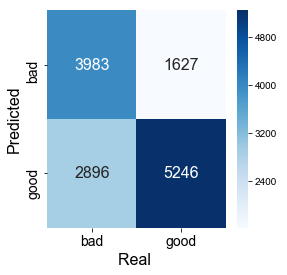

In [75]:
import seaborn as sn
from mlxtend.evaluate import confusion_matrix
cm=confusion_matrix(clf1.best_estimator_.predict(X_test), y_test)
plt.rcParams["figure.figsize"] = [4,4]
sn.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
sns.set(font_scale=1.2)
plt.yticks(fontsize=14)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14);

In [76]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

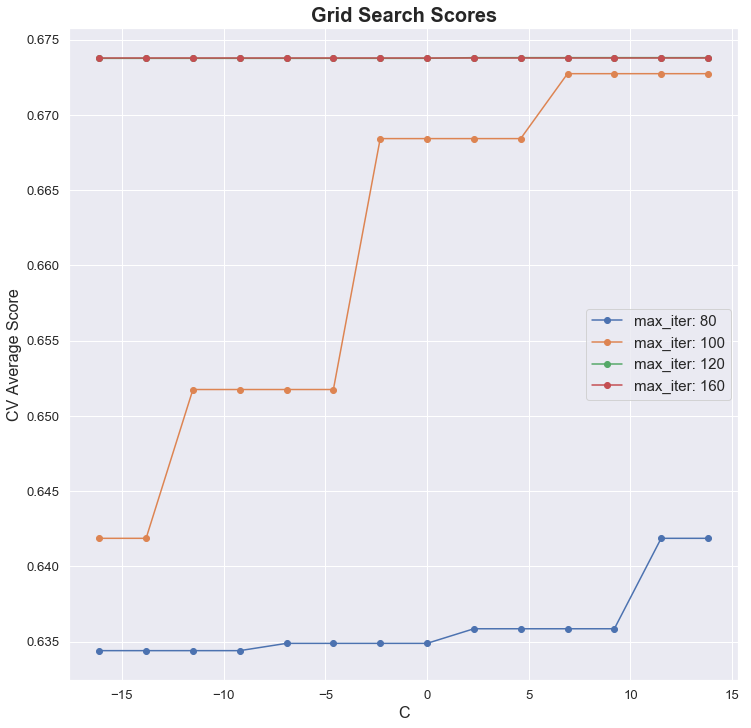

In [77]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf1.cv_results_, np.log(C), max_iter, 'C', 'max_iter')

In [78]:
from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_test, clf1.best_estimator_.predict(X_test)),3)

0.671

### 2.Decision tree

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()
estimators = [('DT', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [80]:
max_depth=[1,2,3,4,8,12]
min_samples_leaf=[1,4,12,16,32]
grid_values = [{'DT' : [DecisionTreeClassifier()],
                'DT__max_depth': max_depth,
                'DT__min_samples_leaf': min_samples_leaf}]
clf2= GridSearchCV(pipe, grid_values, cv = 5)

In [81]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf2=clf2.fit(X_train, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 22.37 seconds


In [82]:
print("Best estimator found by grid search:")
print(clf2.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])


In [83]:
print(classification_report(y_test, clf2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      6879
           1       0.66      0.80      0.72      6873

   micro avg       0.69      0.69      0.69     13752
   macro avg       0.70      0.69      0.69     13752
weighted avg       0.70      0.69      0.69     13752



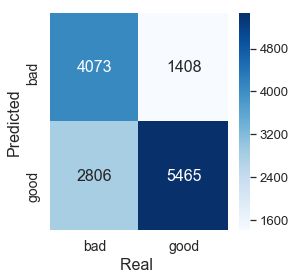

In [84]:
cm=confusion_matrix(clf2.best_estimator_.predict(X_test), y_test)
plt.rcParams["figure.figsize"] = [4,4]
sn.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

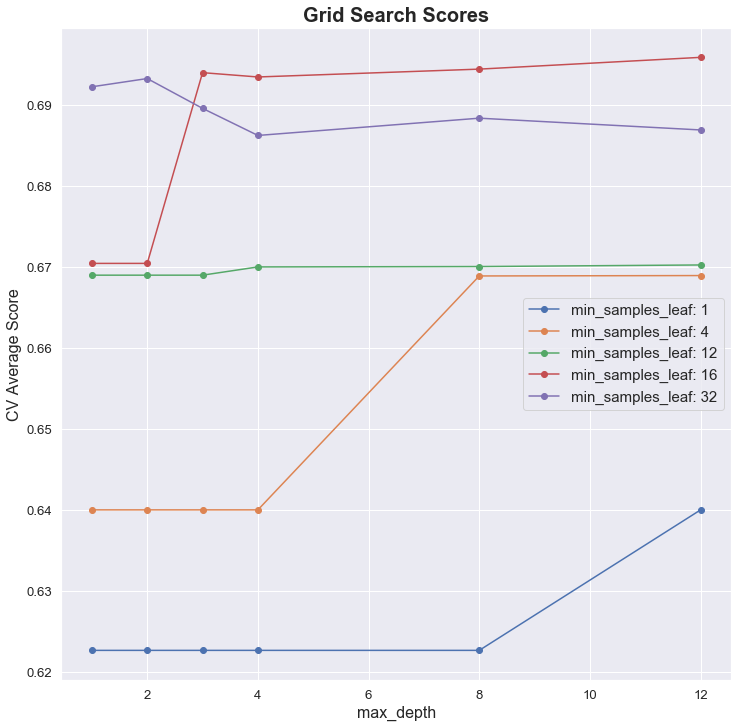

In [85]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf2.cv_results_, max_depth, min_samples_leaf, 'max_depth', 'min_samples_leaf')


In [86]:
round(roc_auc_score(y_test, clf2.best_estimator_.predict(X_test)),3)

0.694

### 3.Random Forest

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
estimators = [('RF', RandomForestClassifier())]

pipe = Pipeline(estimators)

In [88]:
n_estimators=[8,16,32,64]
max_depth=[16,32,64,128,160]
grid_values = [{'RF' : [RandomForestClassifier()],
                'RF__n_estimators': n_estimators,
                'RF__max_depth': max_depth}]
clf3= GridSearchCV(pipe, grid_values, cv = 5)

In [89]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf3=clf3.fit(X_train, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 102.189 seconds


In [90]:
print("Best estimator found by grid search:")
print(clf3.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=64, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


In [91]:
print(classification_report(y_test, clf3.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73      6879
           1       0.71      0.83      0.77      6873

   micro avg       0.75      0.75      0.75     13752
   macro avg       0.75      0.75      0.75     13752
weighted avg       0.75      0.75      0.75     13752



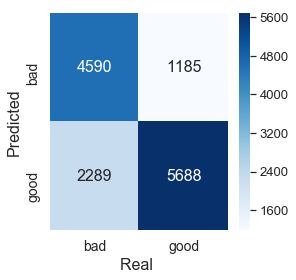

In [92]:
cm=confusion_matrix(clf3.best_estimator_.predict(X_test), y_test)
plt.rcParams["figure.figsize"] = [4,4]
sn.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

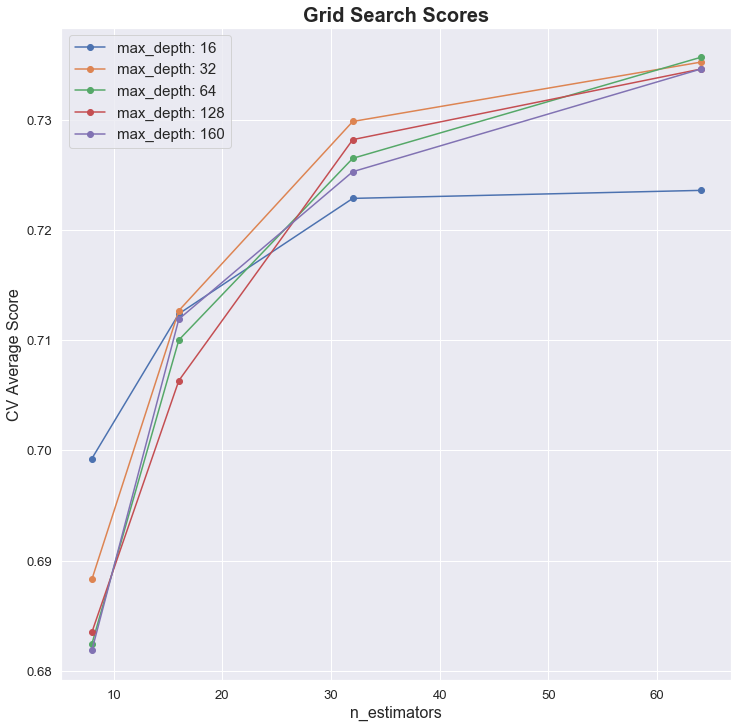

In [93]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf3.cv_results_, n_estimators, max_depth, 'n_estimators', 'max_depth')

In [94]:
round(roc_auc_score(y_test, clf3.best_estimator_.predict(X_test)),3)

0.747

### 5. XGBoost - Tuning Learning rate and max depth

In [101]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
estimators = [('XGB', XGBClassifier())]

pipe = Pipeline(estimators)


In [102]:
# learning_rate=[0.5,0.4,0.1,0.01,0.001]
# max_depth=[16,32,64,128]

learning_rate=[0.5,0.4,0.1,0.01]
max_depth=[2,4,16]
grid_values = [{'XGB' : [XGBClassifier()],
                'XGB__learning_rate': learning_rate,
                'XGB__max_depth': max_depth}]
clf5= GridSearchCV(pipe, grid_values, cv = 5)

In [103]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf5=clf5.fit(X_train, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 707.784 seconds


In [105]:
print("Best estimator found by grid search:")
print(clf5.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('XGB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=16, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


In [106]:
clf5.cv_results_

{'mean_fit_time': array([ 4.13853106,  6.29052153, 21.96952815,  4.15546155,  6.51685205,
        22.17224793,  4.17386813,  6.31709347, 22.60164752,  4.14302559,
         6.37089887, 24.65425482]),
 'std_fit_time': array([0.02092602, 0.03259443, 0.22961471, 0.04038066, 0.26431969,
        0.36549622, 0.05498293, 0.02904189, 0.27842897, 0.02907349,
        0.04723332, 0.09402832]),
 'mean_score_time': array([0.01642165, 0.01961274, 0.07822723, 0.01716027, 0.02546725,
        0.08071933, 0.01775289, 0.02323513, 0.08884616, 0.01490016,
        0.02087836, 0.08782387]),
 'std_score_time': array([0.00065368, 0.00327965, 0.00084004, 0.00041218, 0.00305619,
        0.00096162, 0.00039911, 0.00040318, 0.00595844, 0.00052089,
        0.00479654, 0.00940744]),
 'param_XGB': masked_array(data=[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
        max_delta_step=0, max_depth=16, min_child_weight=1, 

In [107]:
print(classification_report(y_test, clf5.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72      6879
           1       0.71      0.82      0.76      6873

   micro avg       0.74      0.74      0.74     13752
   macro avg       0.75      0.74      0.74     13752
weighted avg       0.75      0.74      0.74     13752



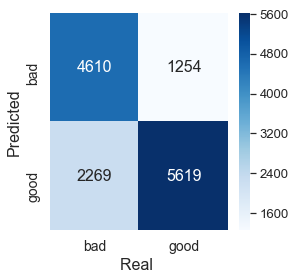

In [108]:
cm=confusion_matrix(clf5.best_estimator_.predict(X_test), y_test)
plt.rcParams["figure.figsize"] = [4,4]
sn.heatmap(cm, cmap='Blues', annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

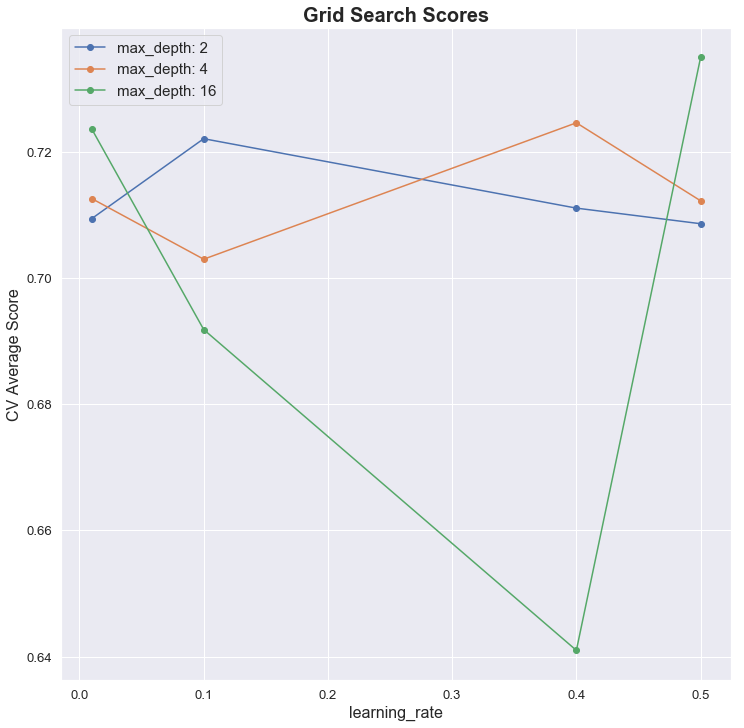

In [109]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf5.cv_results_, learning_rate, max_depth, 'learning_rate', 'max_depth')

In [110]:
round(roc_auc_score(y_test, clf5.best_estimator_.predict(X_test)),3)

0.744

## 6. XGBoost: Tuning n_estimators and max_depth 

In [114]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
estimators = [('XGB', XGBClassifier())]

pipe = Pipeline(estimators)

In [115]:
n_estimators=[30,45,60,90]
max_depth=[2,4,16,24]
grid_values = [{'XGB' : [XGBClassifier()],
                'XGB__n_estimators': n_estimators,
                'XGB__max_depth': max_depth}]
clf6= GridSearchCV(pipe, grid_values, cv = 5)

In [116]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf6=clf6.fit(X_train, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 810.648 seconds


In [117]:
print("Best estimator found by grid search:")
print(clf6.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('XGB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=16, min_child_weight=1, missing=None,
       n_estimators=90, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


In [118]:
clf6.cv_results_

{'mean_fit_time': array([ 1.33393574,  1.99268799,  2.62198453,  3.91290464,  2.07433553,
         3.00444598,  3.87341461,  5.70787435,  7.36148772, 10.65251527,
        13.95699358, 20.46118989, 10.33747101, 15.59964013, 20.53229833,
        30.57266674]),
 'std_fit_time': array([0.02203781, 0.04049196, 0.01056582, 0.03853472, 0.06139343,
        0.05829547, 0.04462884, 0.03324618, 0.03244318, 0.08242151,
        0.0906494 , 0.23980458, 0.07076188, 0.13746671, 0.12598594,
        0.49248447]),
 'mean_score_time': array([0.01388783, 0.01396174, 0.01523705, 0.01838827, 0.01476068,
        0.01722007, 0.0203445 , 0.0225316 , 0.03237944, 0.0454731 ,
        0.05734725, 0.08458667, 0.03871264, 0.05398197, 0.07573361,
        0.10890183]),
 'std_score_time': array([9.68770087e-04, 3.28083370e-06, 1.48556963e-03, 1.33789543e-03,
        7.45957875e-04, 2.41101351e-03, 5.55820871e-03, 8.04314221e-04,
        9.32539733e-04, 1.73389561e-03, 5.49895811e-03, 6.54245211e-03,
        4.51458042e-

In [119]:
print(classification_report(y_test, clf6.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      6879
           1       0.71      0.81      0.76      6873

   micro avg       0.74      0.74      0.74     13752
   macro avg       0.75      0.74      0.74     13752
weighted avg       0.75      0.74      0.74     13752



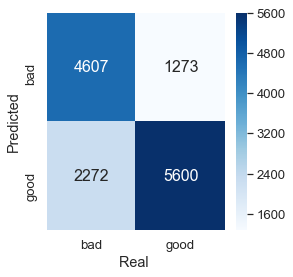

In [120]:
cm=confusion_matrix(clf6.best_estimator_.predict(X_test), y_test)
plt.rcParams["figure.figsize"] = [4,4]
sn.heatmap(cm, cmap='Blues', annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted')
plt.xlabel('Real ');

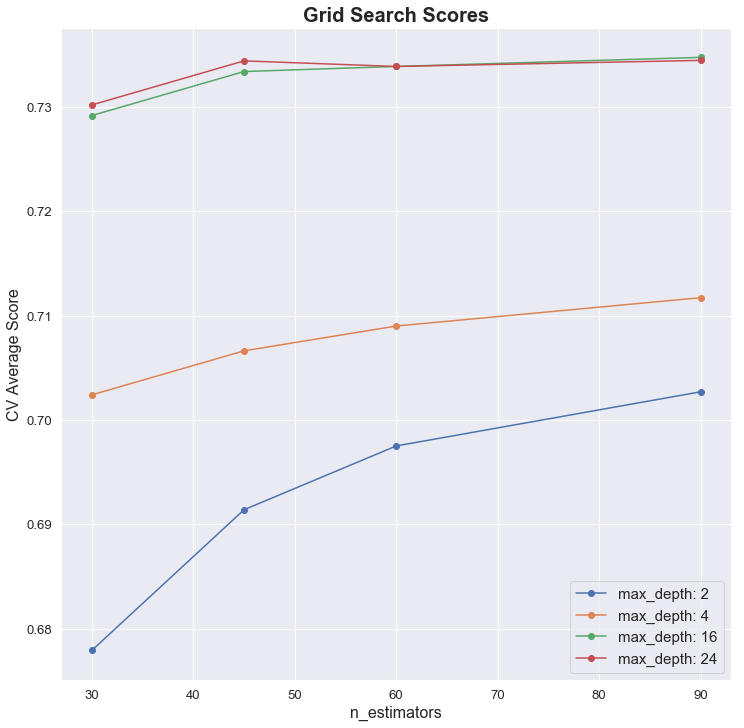

In [121]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf6.cv_results_, n_estimators, max_depth, 'n_estimators', 'max_depth')

In [ ]:
round(roc_auc_score(y_test, clf6.best_estimator_.predict(X_test)),3)

## 7. XGBoost 3: Further optimizing learning rate and max_depth

In [122]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
estimators = [('XGB', XGBClassifier())]

pipe = Pipeline(estimators)

In [123]:
# learning_rate=[0.5,0.4,0.1,0.01,0.001]
# max_depth=[16,32,64,128]

learning_rate=[0.5,0.4,0.1,0.01,0.001]
max_depth=[2,4,16,32,64]
grid_values = [{'XGB' : [XGBClassifier()],
                'XGB__learning_rate': learning_rate,
                'XGB__max_depth': max_depth}]
clf7= GridSearchCV(pipe, grid_values, cv = 5)

In [124]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf7=clf7.fit(X_train, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 3436.13 seconds


In [125]:
print("Best estimator found by grid search:")
print(clf7.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('XGB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=32, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


In [126]:
clf7.cv_results_

{'mean_fit_time': array([ 4.21463194,  6.31911073, 21.86755943, 29.69377098, 29.53035259,
         4.15076799,  6.32053695, 22.02981977, 31.36589303, 34.778197  ,
         4.96852722,  7.82284098, 29.70287805, 54.55433917, 56.68988304,
         6.02412224,  9.28793755, 34.4208725 , 52.55396113, 55.64589229,
         6.13845782,  8.83159356, 34.86185427, 54.2685554 , 55.39246612]),
 'std_fit_time': array([0.1367172 , 0.03391691, 0.07838091, 0.4529111 , 0.33870978,
        0.03545688, 0.06660083, 0.15233359, 0.39173365, 3.72003366,
        0.22591308, 0.3326818 , 1.60600904, 1.92183471, 1.78674034,
        0.24151238, 0.4757727 , 0.62480245, 1.7592569 , 2.35213495,
        0.19056934, 0.51494816, 1.76659838, 1.93576011, 1.60519979]),
 'mean_score_time': array([0.0189496 , 0.02274504, 0.07758799, 0.07898417, 0.08376088,
        0.01688895, 0.02147088, 0.07786698, 0.08802347, 0.10863748,
        0.02132444, 0.02799835, 0.11496019, 0.16120644, 0.1594955 ,
        0.0205976 , 0.02787151, 0.1

In [127]:
print(classification_report(y_test, clf7.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      6879
           1       0.72      0.81      0.76      6873

   micro avg       0.75      0.75      0.75     13752
   macro avg       0.75      0.75      0.74     13752
weighted avg       0.75      0.75      0.74     13752



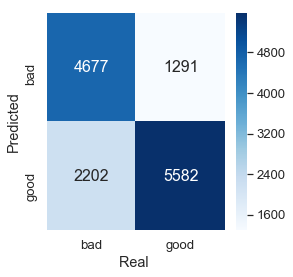

In [128]:
cm=confusion_matrix(clf7.best_estimator_.predict(X_test), y_test)
plt.rcParams["figure.figsize"] = [4,4]
sn.heatmap(cm, cmap='Blues', annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted')
plt.xlabel('Real ');

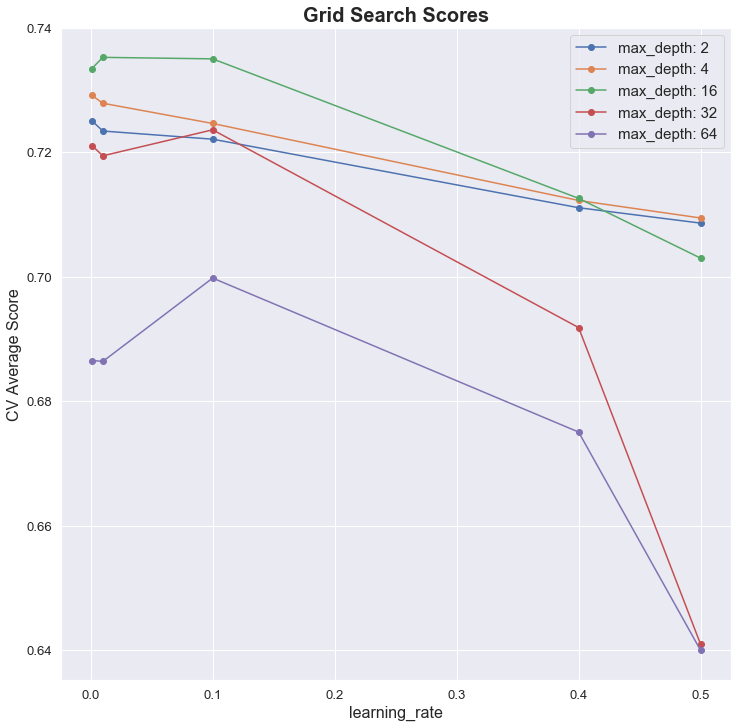

In [129]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf7.cv_results_, learning_rate, max_depth, 'learning_rate', 'max_depth')

In [130]:
round(roc_auc_score(y_test, clf7.best_estimator_.predict(X_test)),3)

0.7460294360539981

## 4. Conclusions

- The best model was the last Model, XGBoost with a learning rate of 0.1 and max_depth of 32.
- The AUC score achieved was 0.746
- Even though we could see some improvement, our goal is to achieve better results, therefore, we decided to move on to Natural Language Processing with Sentiment Analysis.

______________________

# Chapter 2: Sentiment Analysis

- **Summary:** In this chapter we use the review comment messages of each words to predict the score of each order.

- **Remark:** Potentially, you will have to install:
    - from sklearn.feature_extraction.text import TfidfVectorizer
    - from stop_words import get_stop_words

### This chapter is divided in the following steps:

#### 0. Importing libraries and files

#### 1. Exploratory Data Analysis

#### 2. Feature engineering and Data preprocessing

#### 3. Evaluating and defining best models

#### 4. Conclusions

### 0 . Importing required files

In [131]:
reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')

In [132]:
reviews.head(n=3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


### 1. Exploratory Data Analysis

**Approach:**

- Check number of missing values(comments)
- Drop rows with missing comments

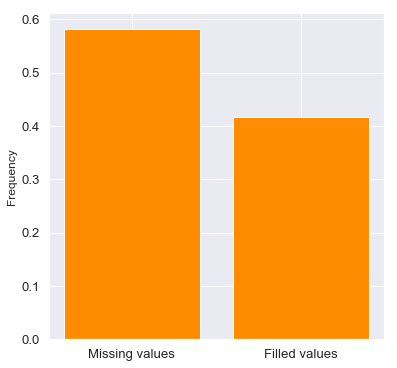

In [157]:
a=reviews['review_comment_message'].isnull().sum()
b=reviews['review_comment_message'].notnull().sum()
c=a/(a+b)
d=b/(a+b)
plt.figure(figsize=(6,6))
plt.bar(x=['Missing values','Filled values'], height=[c,d], color='darkorange')
plt.ylabel('Frequency', fontsize=12)
plt.savefig('Sentiment_plot')
plt.show();

In [135]:
# Dropping rows without comments
reviews_clean=reviews.dropna(subset=['review_comment_message'], how='any')

In [136]:
reviews_clean.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [137]:
from wordcloud import WordCloud, STOPWORDS


In [140]:
text = reviews_clean['review_comment_message'].values
text[0:2]

array(['Recebi bem antes do prazo estipulado.',
       'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa'],
      dtype=object)

## 2. Feature engineering and Data cleaning (Part 1)

#### Approach:
- Removed any line breaks and replaced it with a space.
- Ran a few simple models to have an idea of whether or not it would be interesting to pursue this objective.
- The previous step is identified as 2.1, after we finish it, we resume the data cleaning and feature engineering steps.

In [141]:
# Removing line breaks from the comments
import re

review_escape_v1 = []
review_escape_v2 = []
review_escape_v3 = []
review_escape_v4 = []
for c in list(reviews_clean['review_comment_message'].values):
    c = re.sub(r'\n', ' ', c)
    review_escape_v1.append(c)
for c in review_escape_v1:
    c = re.sub(r'\r', ' ', c)
    review_escape_v2.append(c)
for c in review_escape_v2:
    c = re.sub(r'\t', ' ', c)
    review_escape_v3.append(c)    
for c in review_escape_v3:
    c = re.sub(r'\r\n', ' ', c)
    review_escape_v4.append(c)

#### Checking changes made by comparison 

In [142]:
review_escape_v1!=review_escape_v2

True

In [143]:
review_escape_v2!=review_escape_v3

True

In [144]:
review_escape_v3!=review_escape_v4

False

In [145]:
reviews_clean.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [146]:
reviews_clean2=reviews_clean.replace(to_replace=reviews_clean['review_comment_message'],value=pd.DataFrame(review_escape_v4))

### 2.1 Exploratory analysis with simple models 

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_clean2['review_comment_message'], reviews_clean2['review_score'], test_size=0.4, random_state=42)

bagofwords = CountVectorizer().fit(X_train)
X_train = bagofwords.transform(X_train)
X_train

<25051x12367 sparse matrix of type '<class 'numpy.int64'>'
	with 248840 stored elements in Compressed Sparse Row format>

In [148]:
X_test = bagofwords.transform(X_test)

We can see it is a sparse matrix - we have 13136 unique words across our 27974 sentences. 

##### Now, we try to visualize a few words coming out of the bag of words

In [149]:
words = bagofwords.get_feature_names()
samples = ([words[i] for i in range(1, 13136, round(13136/10))])
print(samples)

['000', 'aprovadissima', 'cobre', 'determinado', 'exijo', 'informado', 'mulher', 'pp401984338br', 'rodo', 'usaram']


In [150]:
counts = np.array(X_train[:,range(1, 13136, round(13136/10))].sum(axis = 0))
print(dict(zip(samples,*counts)))

{'000': 4, 'aprovadissima': 1, 'cobre': 23, 'determinado': 54, 'exijo': 11, 'informado': 105, 'mulher': 5, 'pp401984338br': 1, 'rodo': 2, 'usaram': 2}


In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.68


##### Running a few models to evaluate the potential of the data

              precision    recall  f1-score   support

           1       0.67      0.83      0.74      3678
           2       0.20      0.05      0.08       936
           3       0.29      0.13      0.18      1474
           4       0.33      0.12      0.17      2395
           5       0.75      0.94      0.83      8219

   micro avg       0.68      0.68      0.68     16702
   macro avg       0.45      0.41      0.40     16702
weighted avg       0.60      0.68      0.62     16702



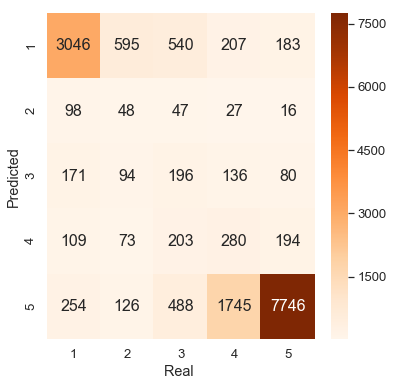

In [160]:
from sklearn.metrics import classification_report

logit = LogisticRegression()
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_pred, y_test)

#confusion matrix   
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5'])

plt.ylabel('Predicted')
plt.xlabel('Real ');

              precision    recall  f1-score   support

           1       0.62      0.69      0.65      3678
           2       0.17      0.11      0.13       936
           3       0.21      0.16      0.18      1474
           4       0.23      0.14      0.18      2395
           5       0.74      0.84      0.78      8219

   micro avg       0.61      0.61      0.61     16702
   macro avg       0.39      0.39      0.38     16702
weighted avg       0.56      0.61      0.58     16702



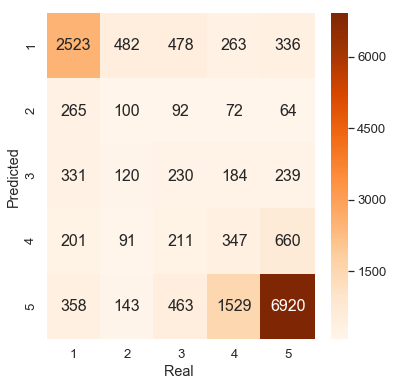

In [159]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth=100, random_state=42)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

print(classification_report(y_test, y_pred))

#confusion matrix
plt.figure(figsize=(6,6))
cm=confusion_matrix(y_pred, y_test)
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5'])

plt.ylabel('Predicted')
plt.xlabel('Real ');

              precision    recall  f1-score   support

           1       0.67      0.75      0.71      3678
           2       0.17      0.10      0.12       936
           3       0.26      0.15      0.19      1474
           4       0.28      0.12      0.17      2395
           5       0.75      0.92      0.83      8219

   micro avg       0.65      0.65      0.65     16702
   macro avg       0.42      0.41      0.40     16702
weighted avg       0.59      0.65      0.61     16702



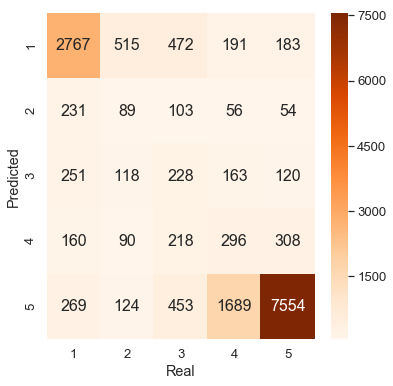

In [162]:
from sklearn.svm import LinearSVC

SVM_model = LinearSVC()
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)

print(classification_report(y_test, y_pred))

#confusion matrix
plt.figure(figsize=(6,6))
cm=confusion_matrix(y_pred, y_test)
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5'])

plt.ylabel('Predicted')
plt.xlabel('Real');

## 2.0 Feature engineering and Data cleaning  (Part 2)

**Approach:**
- As the text is all written in portuguese, we imported portuguese stop words.
- Removed stop words from text (review_comment_message) and created a new column with the output comment_clean(to track changes).
- Formatting Upper case letters and changing into lower case (comment_clean2)
- Reseted the index of rows and created a new dataframe as the output reviews_clean3 in case we still need the previous dataframe.
- Removed website information.
- Removed punctuation.

In [163]:
from stop_words import get_stop_words

stop_words = get_stop_words('pt')
stop_words = get_stop_words('portuguese')
print('Total number of stop words in portuguese: ',len(stop_words))
print('showing first 5 stop words: ',stop_words[:5])


Total number of stop words in portuguese:  203
showing first 5 stop words:  ['a', 'ao', 'aos', 'aquela', 'aquelas']


In [164]:
reviews_clean2.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01


#### Stop-words

There is no capital "A", "As"

In [165]:
len(stop_words)

203

In [166]:
#removing stop-words
reviews_clean2['comment_clean']=reviews_clean2['review_comment_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [167]:
reviews_clean2.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,comment_clean
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar Intern...


#### Uppercase letters

In [168]:
#Converting all letters into lower case
reviews_clean2['comment_clean2']=reviews_clean2['comment_clean'].str.lower()

In [170]:
#Comparing before after results
reviews_clean2[['review_score','comment_clean','comment_clean2']].head(5)

,review_score,comment_clean,comment_clean2
3,5,Recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar Intern...,parabéns lojas lannister adorei comprar intern...
9,4,aparelho eficiente. site marca aparelho impres...,aparelho eficiente. site marca aparelho impres...
12,4,"Mas pouco ,travando...pelo valor ta Boa.","mas pouco ,travando...pelo valor ta boa."
15,5,"Vendedor confiável, produto ok entrega antes p...","vendedor confiável, produto ok entrega antes p..."


In [172]:
#reseting index and creating a new dataframe with the results
reviews_clean3=reviews_clean2.reset_index(drop=True)

In [173]:
reviews_clean3.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,comment_clean,comment_clean2
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado.
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar Intern...,parabéns lojas lannister adorei comprar intern...


#### Web addresses

In [174]:
reviews_clean3['comment_clean3'] =reviews_clean3['comment_clean2'].apply(lambda x: re.sub('(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x))

In [175]:
reviews_clean3.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,comment_clean,comment_clean2,comment_clean3
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado.
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar Intern...,parabéns lojas lannister adorei comprar intern...,parabéns lojas lannister adorei comprar intern...


In [176]:
import string

In [177]:
reviews_clean3['comment_clean4'] =reviews_clean3['comment_clean2'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [178]:
reviews_clean3.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,comment_clean,comment_clean2,comment_clean3,comment_clean4
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar Intern...,parabéns lojas lannister adorei comprar intern...,parabéns lojas lannister adorei comprar intern...,parabéns lojas lannister adorei comprar intern...
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,aparelho eficiente. site marca aparelho impres...,aparelho eficiente. site marca aparelho impres...,aparelho eficiente. site marca aparelho impres...,aparelho eficiente site marca aparelho impress...


## 2.0 Feature engineering and Data cleaning  (Part 3)

**Approach:**
- Plotting the most common words from good and bad reviews in separate wordcloud plots

#### Visualizing most common words for good scores (>3) and bad scores(<3)

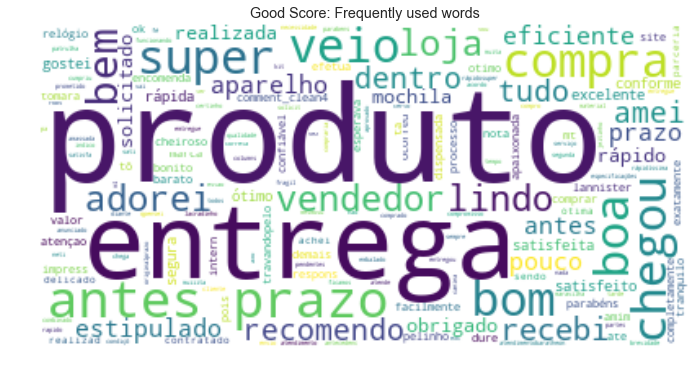

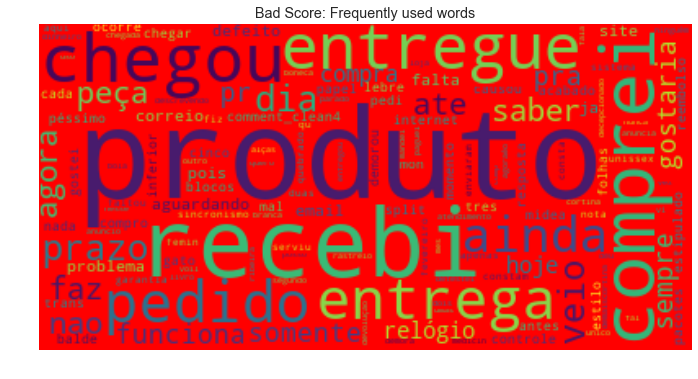

In [181]:
good_words=reviews_clean3[reviews_clean3.review_score >3][['comment_clean4']]
bad_words=reviews_clean3[reviews_clean3.review_score <3][['comment_clean4']]
wc = WordCloud(background_color="white", max_words=1000,
               stopwords=set(stop_words), contour_width=3, contour_color='firebrick')
# Generate a wordcloud
wc.generate(str(good_words))

# show
plt.figure(figsize=[12,6])
plt.imshow(wc, interpolation='bilinear')
plt.title('Good Score: Frequently used words')
plt.axis("off")
plt.show();

wc = WordCloud(background_color="red", max_words=1000,
               stopwords=set(stop_words), contour_width=3, contour_color='firebrick')
# Generate a wordcloud
wc.generate(str(bad_words))

# show
plt.figure(figsize=[12,6])
plt.imshow(wc, interpolation='bilinear')
plt.title('Bad Score: Frequently used words')
plt.axis("off")
plt.show()

In [182]:
reviews_clean3=reviews_clean3.drop(reviews_clean3[reviews_clean3['review_score']==3].index,axis=0)

In [183]:
# for values in reviews_clean3['review_score']:
reviews_clean3['review_score_binary']=reviews_clean3['review_score'].apply(lambda X: np.where(X>3,1,0))

## 3. Evaluating and defining best models

**Approach:**

- Using gridsearchcv, we fitted the model in a:
    - Logistic regression
    - Decision tree
    - Random forest
    - SVM
    - XGBoost (learning rate and max depth)
    - XGBoost (n estimators and max depth)
    - XGBoost (learning rate and max depth, fine tuning)
 - For each model we:
     - Used TfidVectorizer to count the frequency of each word
     - Tuned two hyperparameters
     - Called the best estimator parameters
     - Printed a classification report for the best estimator
     - Plotted a confusion matrix for the best estimator
     - Plotted the results in a graph to provide visual interpretation and identify trends.

- Used the best estimator parameters from the logistic regression model  and used in a new logistic regression to check the coefficients with the highest and lowest values.
- The highest coefficients are related to good reviews, therefore we can determine the most important factors for consumers to give high scores for products.
- The lowest coefficients are related to bad reviews, therefore we can determine the most important factors for consumers to give low scores for products.

 **Objective:**
- Define best model to be used.
- Identify most important qualities associated with well reviewed products.
- Identify most important aspects associated with poorly reviewed products.

#### TfidVectorizer: evaluating word frequency 

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

#### 0.SVC

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

X_train_tfid0=vectorizer.fit_transform(X_train)

X_test_tfid0=vectorizer.transform(X_test)

print("Fitting the classifier to the training set")
C=[1e3, 5e3, 1e4, 5e4, 1e5]
gamma=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]
param_grid = {'C': C,
              'gamma': gamma }
clf0 = GridSearchCV(SVC(kernel='rbf'), param_grid)
clf0 = clf0.fit(X_train_tfid0, y_train)

Fitting the classifier to the training set


In [188]:
print("Best estimator found by grid search:")
print(clf0.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4670
           1       0.94      0.95      0.94     10566

   micro avg       0.92      0.92      0.92     15236
   macro avg       0.91      0.91      0.91     15236
weighted avg       0.92      0.92      0.92     15236



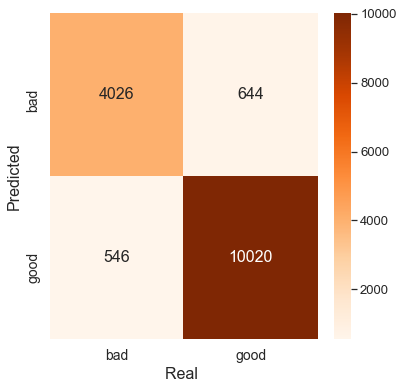

In [189]:
print(classification_report(clf0.best_estimator_.predict(X_test_tfid0), y_test))
plt.figure(figsize=(6,6))
cm=confusion_matrix(clf0.best_estimator_.predict(X_test_tfid0), y_test)
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [190]:
roc_auc_score(y_test, clf0.predict(X_test_tfid0))

0.9100936651485706

In [191]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

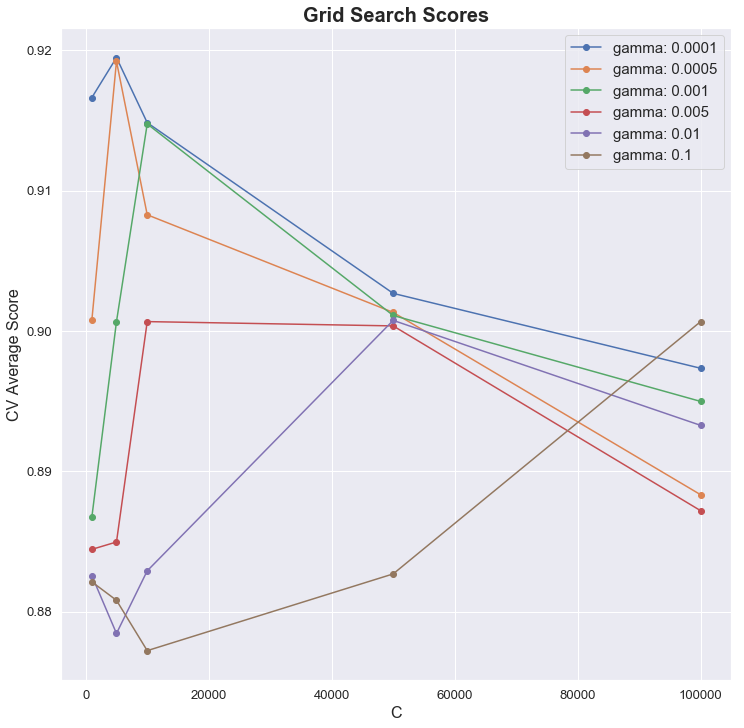

In [194]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf0.cv_results_, C, gamma, 'C', 'gamma')

#### 1.Logistic Regression

In [195]:
from sklearn.pipeline import Pipeline
estimators = [('LR', LogisticRegression(solver='lbfgs'))]

pipe = Pipeline(estimators)

In [196]:
from sklearn.model_selection import GridSearchCV
C=[0.0000001,  0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0,1000000.0]
max_iter=[80,100,120,160]
grid_values = [{'LR' : [LogisticRegression(solver='lbfgs')],
                'LR__penalty': ['l2'],
                'LR__C': C,
                'LR__max_iter':max_iter}]
clf1= GridSearchCV(pipe, grid_values, cv = 5)

In [197]:
# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

X_train_tfid1=vectorizer.fit_transform(X_train)

X_test_tfid1=vectorizer.transform(X_test)

In [198]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf1=clf1.fit(X_train_tfid1, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 66.266 seconds


In [199]:
print("Best estimator found by grid search:")
print(clf1.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=80, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])


In [200]:
print(classification_report(y_test, clf1.best_estimator_.predict(X_test_tfid1)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4572
           1       0.94      0.95      0.94     10664

   micro avg       0.92      0.92      0.92     15236
   macro avg       0.91      0.91      0.91     15236
weighted avg       0.92      0.92      0.92     15236



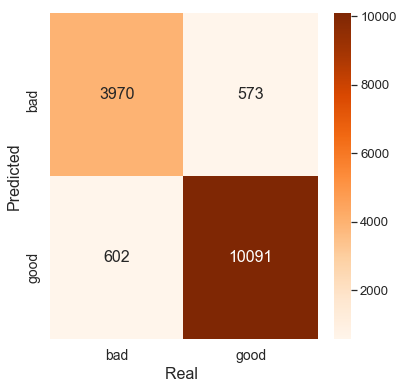

In [201]:
cm=confusion_matrix(clf1.best_estimator_.predict(X_test_tfid1), y_test)
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
sns.set(font_scale=1.2)
plt.yticks(fontsize=14)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14);

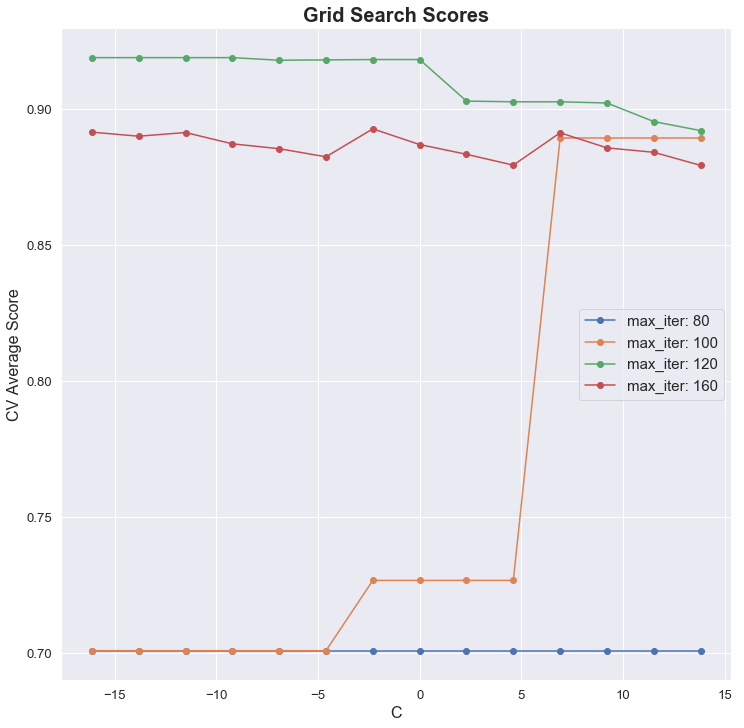

In [202]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf1.cv_results_, np.log(C), max_iter, 'C', 'max_iter')

In [203]:
roc_auc_score(y_test, clf1.best_estimator_.predict(X_test_tfid1))

0.9072983879171893

#### 2.Decision tree

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()
estimators = [('DT', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [212]:
max_depth=[1,2,3,4,8,12]
min_samples_leaf=[1,4,12,16,32]
grid_values = [{'DT' : [DecisionTreeClassifier()],
                'DT__max_depth': max_depth,
                'DT__min_samples_leaf': min_samples_leaf}]
clf2= GridSearchCV(pipe, grid_values, cv = 5)

In [213]:
# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

X_train_tfid2=vectorizer.fit_transform(X_train)

X_test_tfid2=vectorizer.transform(X_test)

In [214]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf2=clf2.fit(X_train_tfid2, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 39.731 seconds


In [215]:
print("Best estimator found by grid search:")
print(clf2.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])


In [216]:
print(classification_report(y_test, clf2.best_estimator_.predict(X_test_tfid2)))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70      4572
           1       0.85      0.93      0.89     10664

   micro avg       0.84      0.84      0.84     15236
   macro avg       0.83      0.78      0.80     15236
weighted avg       0.84      0.84      0.83     15236



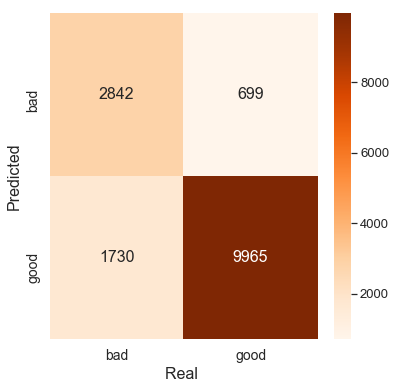

In [217]:
cm=confusion_matrix(clf2.best_estimator_.predict(X_test_tfid2), y_test)
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

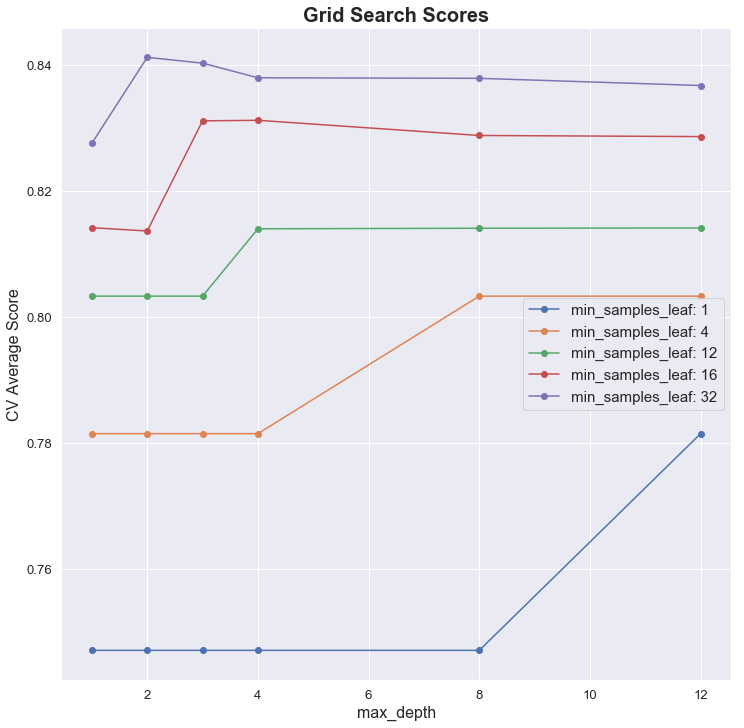

In [218]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf2.cv_results_, max_depth, min_samples_leaf, 'max_depth', 'min_samples_leaf')


In [219]:
roc_auc_score(y_test, clf2.best_estimator_.predict(X_test_tfid2))

0.7780310809329629

#### 3.Random Forest

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
estimators = [('RF', RandomForestClassifier())]

pipe = Pipeline(estimators)

In [221]:
n_estimators=[8,16,32,64]
max_depth=[16,32,64,128,160]
grid_values = [{'RF' : [RandomForestClassifier()],
                'RF__n_estimators': n_estimators,
                'RF__max_depth': max_depth}]
clf3= GridSearchCV(pipe, grid_values, cv = 5)

In [222]:
# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

X_train_tfid3=vectorizer.fit_transform(X_train)

X_test_tfid3=vectorizer.transform(X_test)

In [223]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf3=clf3.fit(X_train_tfid3, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 462.526 seconds


In [224]:
print("Best estimator found by grid search:")
print(clf3.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=128, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


In [225]:
print(classification_report(y_test, clf3.best_estimator_.predict(X_test_tfid3)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4572
           1       0.93      0.94      0.93     10664

   micro avg       0.91      0.91      0.91     15236
   macro avg       0.89      0.88      0.89     15236
weighted avg       0.91      0.91      0.91     15236



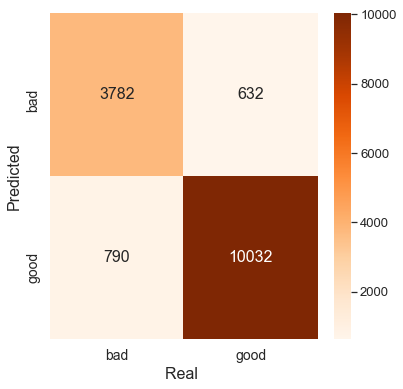

In [226]:
cm=confusion_matrix(clf3.best_estimator_.predict(X_test_tfid3), y_test)
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

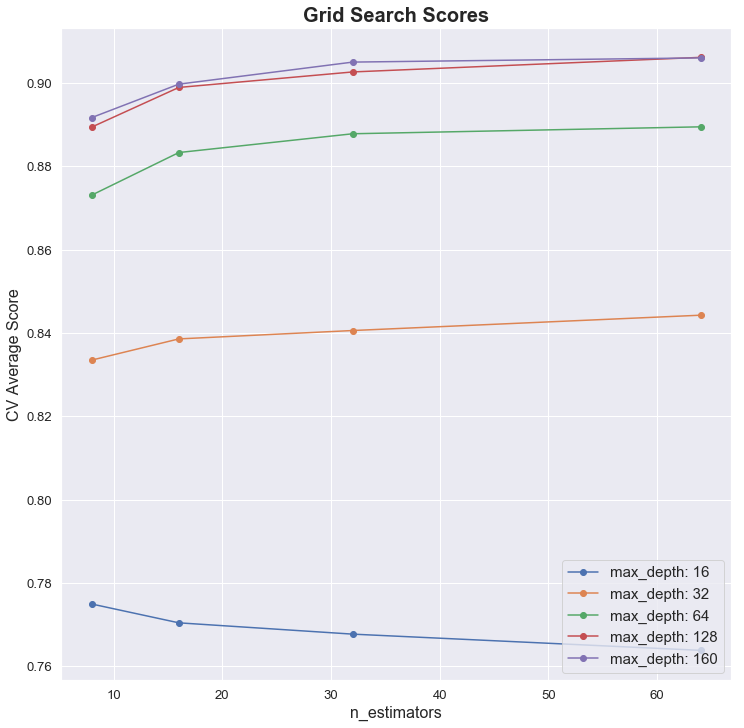

In [227]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf3.cv_results_, n_estimators, max_depth, 'n_estimators', 'max_depth')

In [228]:
roc_auc_score(y_test, clf3.best_estimator_.predict(X_test_tfid3))

0.8839721413292956

#### XGBoost

In [229]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
estimators = [('XGB', XGBClassifier())]

pipe = Pipeline(estimators)

In [230]:
# learning_rate=[0.5,0.4,0.1,0.01,0.001]
# max_depth=[16,32,64,128]

learning_rate=[0.5,0.4,0.1,0.01]
max_depth=[2,4,16]
grid_values = [{'XGB' : [XGBClassifier()],
                'XGB__learning_rate': learning_rate,
                'XGB__max_depth': max_depth}]
clf4= GridSearchCV(pipe, grid_values, cv = 5)

In [231]:
# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

X_train_tfid4=vectorizer.fit_transform(X_train)

X_test_tfid4=vectorizer.transform(X_test)

In [232]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf4=clf4.fit(X_train_tfid4, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 602.262 seconds


In [233]:
print("Best estimator found by grid search:")
print(clf4.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('XGB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.4,
       max_delta_step=0, max_depth=16, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


In [234]:
clf4.cv_results_

{'mean_fit_time': array([ 2.86845398,  5.29077139, 19.36768999,  2.86719513,  5.2888185 ,
        19.42596455,  2.88996563,  5.30969553, 20.25069809,  2.92082253,
         5.43134961, 22.14919496]),
 'std_fit_time': array([0.03308415, 0.05321826, 0.04878115, 0.03358837, 0.06670366,
        0.06803518, 0.01803962, 0.02192838, 0.08789431, 0.03935933,
        0.02302281, 0.08695129]),
 'mean_score_time': array([0.01768637, 0.02234101, 0.05306592, 0.01795125, 0.02196817,
        0.05630937, 0.01973467, 0.02373629, 0.07160978, 0.01698318,
        0.02412858, 0.09750652]),
 'std_score_time': array([1.10088021e-03, 4.88811281e-04, 7.55442180e-04, 9.65521657e-07,
        6.18618111e-04, 2.44207410e-03, 2.10005325e-03, 1.59690503e-03,
        1.46267833e-03, 5.46729933e-05, 2.39750773e-03, 1.61475585e-03]),
 'param_XGB': masked_array(data=[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.4,
        max_

In [235]:
print(classification_report(y_test, clf4.best_estimator_.predict(X_test_tfid4)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4572
           1       0.93      0.94      0.94     10664

   micro avg       0.91      0.91      0.91     15236
   macro avg       0.90      0.89      0.90     15236
weighted avg       0.91      0.91      0.91     15236



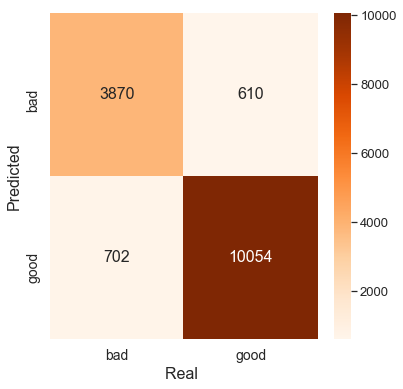

In [236]:
cm=confusion_matrix(clf4.best_estimator_.predict(X_test_tfid4), y_test)
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap='Oranges', annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted', fontsize=16)
plt.xlabel('Real ', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

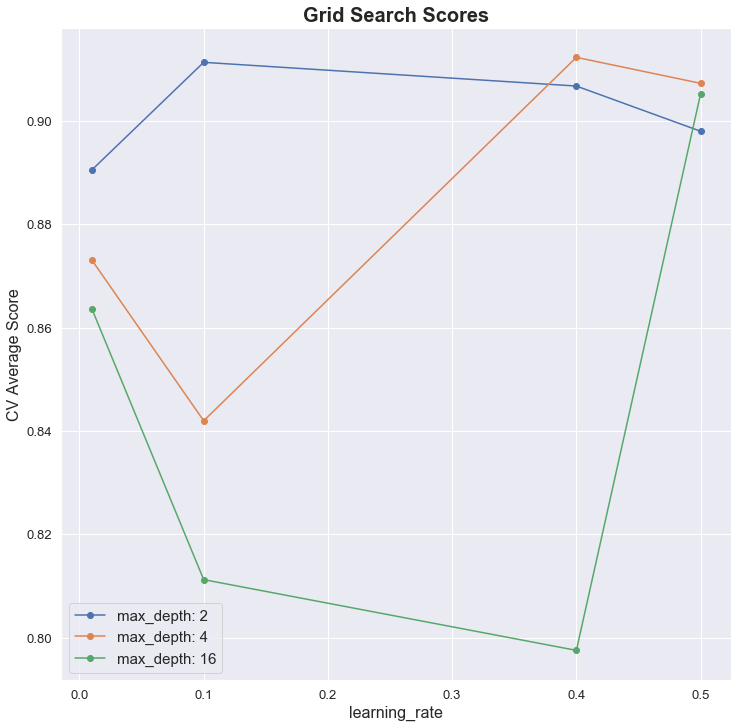

In [237]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf4.cv_results_, learning_rate, max_depth, 'learning_rate', 'max_depth')

In [238]:
roc_auc_score(y_test, clf4.best_estimator_.predict(X_test_tfid4))

0.8946274462316367

### XGBoost 2

In [239]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
estimators = [('XGB', XGBClassifier())]

pipe = Pipeline(estimators)

In [240]:
n_estimators=[30,45,60,90]
max_depth=[2,4,16,24]
grid_values = [{'XGB' : [XGBClassifier()],
                'XGB__n_estimators': n_estimators,
                'XGB__max_depth': max_depth}]
clf5= GridSearchCV(pipe, grid_values, cv = 5)

In [241]:
# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

X_train_tfid5=vectorizer.fit_transform(X_train)

X_test_tfid5=vectorizer.transform(X_test)

In [242]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf5=clf5.fit(X_train_tfid5, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 712.042 seconds


In [243]:
print("Best estimator found by grid search:")
print(clf5.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('XGB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=24, min_child_weight=1, missing=None,
       n_estimators=90, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


In [244]:
clf5.cv_results_

{'mean_fit_time': array([ 0.90125661,  1.32839775,  1.74120455,  2.61657004,  1.68622179,
         2.44195881,  3.2346437 ,  4.81085253,  6.46166663,  9.40675712,
        12.41073318, 18.1939877 ,  9.45502434, 13.89949784, 18.16045599,
        27.02803736]),
 'std_fit_time': array([0.00842416, 0.0110768 , 0.0120462 , 0.04774546, 0.03280242,
        0.01705117, 0.02638178, 0.03303555, 0.05327255, 0.05303654,
        0.07800441, 0.03234454, 0.03737277, 0.06745505, 0.08700787,
        0.3637661 ]),
 'mean_score_time': array([0.01372552, 0.01596651, 0.01657372, 0.01854219, 0.01616459,
        0.0175694 , 0.01868134, 0.02215285, 0.02998252, 0.03890796,
        0.04628081, 0.06563516, 0.03657775, 0.05227718, 0.06662765,
        0.09235249]),
 'std_score_time': array([0.00288235, 0.00063196, 0.00048395, 0.00213231, 0.00039553,
        0.0004703 , 0.00158907, 0.00039429, 0.00096747, 0.00593247,
        0.0004702 , 0.0011561 , 0.00599295, 0.00048089, 0.00074218,
        0.00194943]),
 'param_XG

In [245]:
print(classification_report(y_test, clf5.best_estimator_.predict(X_test_tfid5)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4572
           1       0.93      0.94      0.93     10664

   micro avg       0.91      0.91      0.91     15236
   macro avg       0.89      0.89      0.89     15236
weighted avg       0.91      0.91      0.91     15236



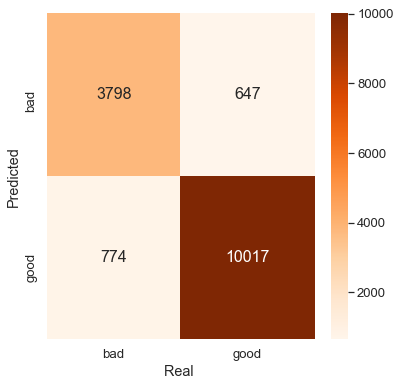

In [246]:
cm=confusion_matrix(clf5.best_estimator_.predict(X_test_tfid5), y_test)
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap='Oranges', annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted')
plt.xlabel('Real ');

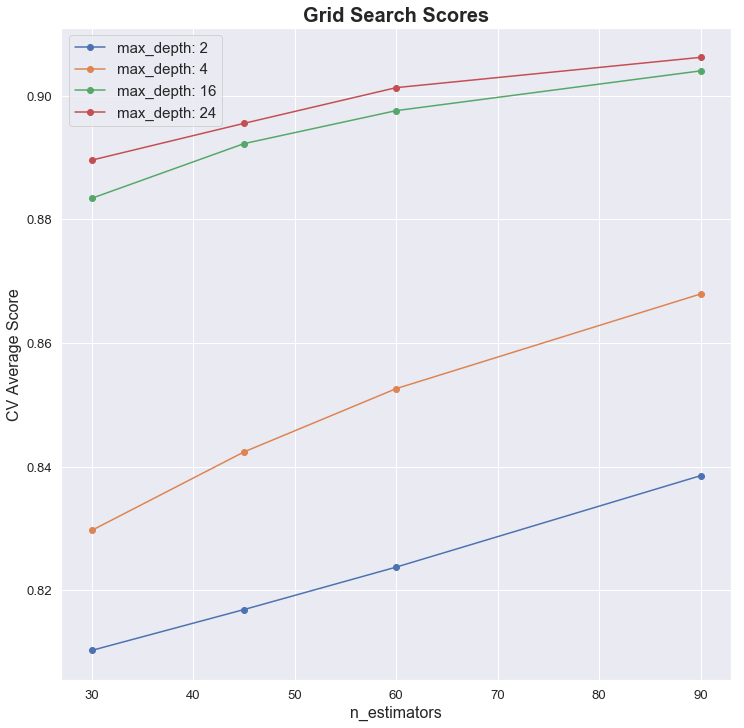

In [247]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf5.cv_results_, n_estimators, max_depth, 'n_estimators', 'max_depth')

### XGBoost 3

In [248]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
estimators = [('XGB', XGBClassifier())]

pipe = Pipeline(estimators)

In [249]:
# learning_rate=[0.5,0.4,0.1,0.01,0.001]
# max_depth=[16,32,64,128]

learning_rate=[0.5,0.4,0.1,0.01,0.001]
max_depth=[2,4,16,32,64]
grid_values = [{'XGB' : [XGBClassifier()],
                'XGB__learning_rate': learning_rate,
                'XGB__max_depth': max_depth}]
clf6= GridSearchCV(pipe, grid_values, cv = 5)

In [250]:
# Split into training & test sets (Create the validate data set)
X_train, X_test, y_train, y_test = train_test_split(reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

X_train_tfid6=vectorizer.fit_transform(X_train)

X_test_tfid6=vectorizer.transform(X_test)

In [251]:
warnings.filterwarnings('ignore')
start_time = time.time()
clf6=clf6.fit(X_train_tfid6, y_train)

end_time = time.time()
    
runtime = end_time - start_time
print('Total required time: '+str(round(runtime,3)) + ' seconds')

Total required time: 3592.925 seconds


In [252]:
print("Best estimator found by grid search:")
print(clf6.best_estimator_)

Best estimator found by grid search:
Pipeline(memory=None,
     steps=[('XGB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.4,
       max_delta_step=0, max_depth=16, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


In [253]:
clf6.cv_results_

{'mean_fit_time': array([ 2.85817695,  5.21302171, 19.24925961, 37.14151506, 68.2110487 ,
         2.85207028,  5.26735272, 19.35817647, 37.19660649, 69.33599491,
         2.86874166,  5.38219805, 20.17879715, 38.75044131, 72.66268687,
         2.88505182,  5.43186989, 22.00003753, 42.02112985, 75.75925345,
         3.08220534,  5.686518  , 21.78619695, 41.97641277, 76.56970267]),
 'std_fit_time': array([0.04511415, 0.02742789, 0.07081554, 0.08951857, 0.26116511,
        0.02335773, 0.07855029, 0.03034079, 0.05565173, 0.20016867,
        0.03949114, 0.07799285, 0.08275802, 0.14312524, 0.19813247,
        0.002119  , 0.03014948, 0.11143998, 0.11405186, 0.54084894,
        0.19183688, 0.24264158, 0.0376056 , 0.306184  , 0.16820643]),
 'mean_score_time': array([0.01776032, 0.02029495, 0.05345073, 0.10336566, 0.16860414,
        0.01729555, 0.02214918, 0.05504861, 0.10570846, 0.17474103,
        0.01884465, 0.02375312, 0.07248774, 0.12189369, 0.19109135,
        0.01675644, 0.02047629, 0.1

In [254]:
print(classification_report(y_test, clf6.best_estimator_.predict(X_test_tfid6)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4572
           1       0.93      0.94      0.94     10664

   micro avg       0.91      0.91      0.91     15236
   macro avg       0.90      0.89      0.90     15236
weighted avg       0.91      0.91      0.91     15236



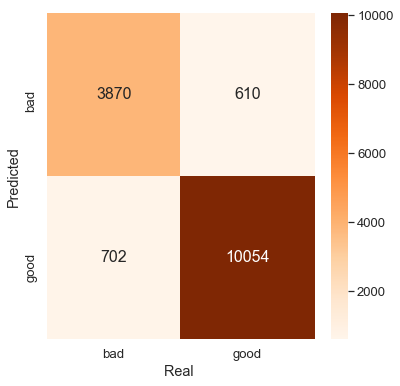

In [255]:
cm=confusion_matrix(clf6.best_estimator_.predict(X_test_tfid6), y_test)
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap='Oranges', annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.ylabel('Predicted')
plt.xlabel('Real ');

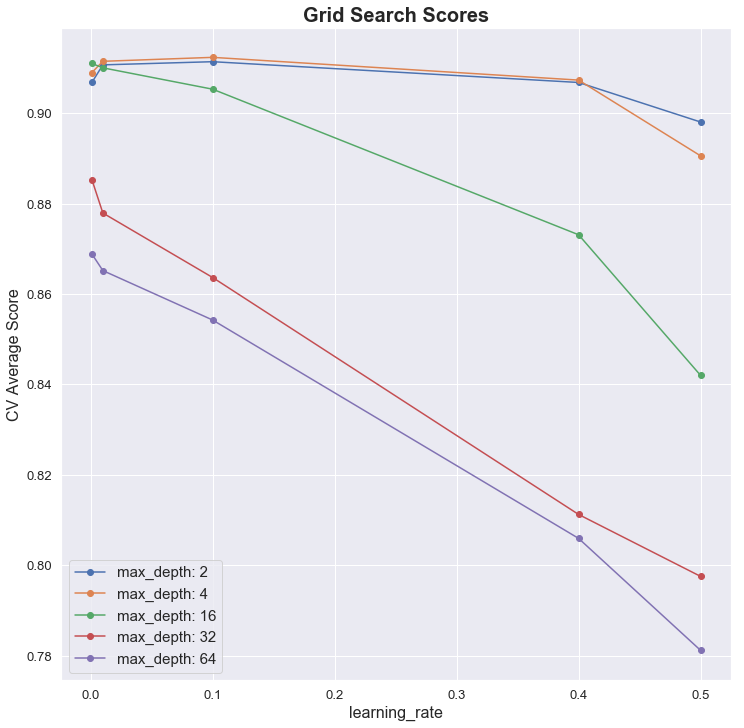

In [256]:
# Calling Method 
plt.rcParams["figure.figsize"] = [12,12]
plot_grid_search(clf6.cv_results_, learning_rate, max_depth, 'learning_rate', 'max_depth')

In [258]:
round(roc_auc_score(y_test, clf6.best_estimator_.predict(X_test_tfid6)),3)

0.895

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4572
           1       0.94      0.95      0.94     10664

   micro avg       0.92      0.92      0.92     15236
   macro avg       0.91      0.91      0.91     15236
weighted avg       0.92      0.92      0.92     15236



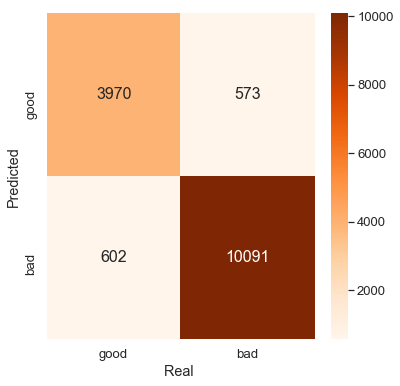

In [272]:
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(
     reviews_clean3['comment_clean3'], reviews_clean3['review_score_binary'], test_size=0.4, random_state=42)

## Fitting the desired model
logit = LogisticRegression(penalty='l2',C=1.0,max_iter=80, solver='lbfgs')
# vect = CountVectorizer(min_df=0.001,max_df=0.50,strip_accents='unicode').fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
logit.fit(X_train_vectorized, y_train)

y_pred = logit.predict(vectorizer.transform(X_test))

print(classification_report(y_test, y_pred))

#confusion matrix
cm=confusion_matrix(y_pred, y_test)
plt.figure(figsize=(6,6))
sn.heatmap(cm, cmap="Oranges", annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['good','bad'],yticklabels=['good','bad'])

plt.ylabel('Predicted')
plt.xlabel('Real ');

### Identifying main root causes for good and bad review scores

In [273]:
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), logit.coef_[0]
    )
}
print('Good Review words')
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print()    
print('Bad Review words')   
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

Good Review words
('antes', 6.168066372090803)
('excelente', 5.61628835636815)
('ótimo', 5.315132538827226)
('rápida', 5.043991337767124)
('rápido', 4.496328622828783)
('adorei', 4.255637127662045)
('prazo', 4.1741074031975245)
('lindo', 4.168076753080663)
('parabéns', 4.161040662647101)
('bom', 4.132461748368209)
('recomendo', 4.112594746283625)
('perfeito', 4.071005056794634)
('bem', 4.062483163936927)
('satisfeito', 3.867951589074528)
('amei', 3.8666878039548447)
('tudo', 3.812799595824197)
('ótima', 3.7645501927649025)
('otimo', 3.434852258177765)
('satisfeita', 3.387263188379383)
('conforme', 3.1634049651463645)

Bad Review words
('não', -5.50917024550281)
('péssima', -4.05130608856222)
('comprei', -3.985857311285229)
('nao', -3.941509215738644)
('péssimo', -3.6281063189216947)
('ruim', -3.4283679691615605)
('inferior', -3.1793259509009273)
('diferente', -3.114527643763468)
('passou', -3.087952476865588)
('dinheiro', -3.0839691173061405)
('agora', -3.0177091355507653)
('decepciona

## 4. Conclusions

- The best model was the SVM with an AUC-ROC score of 0.91 and a precision of 0.88 for class 0 and 0.94 for class 1.
- For a e-commerce, it would be important to avoid having low precision, because in this scenario, we would be predicting a product has a good score, while it has a poor one.
- Since consumers rely heavily on price and score when deciding to buy a product we would like to remove poorly scored products from the e-shelves. By classifying a bad product as a good one, we would end up leaving the product in the e-store (Looking from an e-commerce perspective).

- Lastly, we collected the words with the highest predictive power both for poor and good reviews.
- Summarizing, we could say that for:
    - Good reviews often emphasize on:
        - Quality('excelente', 'otimo', 'otima','satisfeito', 'amei', 'bem', 'bom') 
        - Time ('Antes', 'Prazo')
        - Expectation/Description('conforme', 'satisfeito')
    - Bad reviews often emphasize on:
        - Quality('ruim', 'inferior', 'otima','pessima') 
        - Time ('Demora', 'Recebi', 'Aguardando')
        - Expectation/Description('faltando', 'decepcionada')
        
- Our conclusion is that delivering the product on time, selling good quality products and, surprisingly, properly describing a product are the most important factors and failing in any of these, will likely result in bad scores.

# Chapter 3 - Clustering customer groups
___

**Remark:** Potentially, you will have to install the following libraries:

    - from sklearn.datasets import make_blobs
    - from yellowbrick.cluster import KElbowVisualizer

### This chapter is divided in the following steps:

#### 0. Importing libraries and files

#### 1. Feature engineering

#### 2. Data preprocessing

#### 3. Clustering: K-Means and Gaussian Mixed Models

#### 4. Conclusions

**Remark:**
- Since the dataset used is the same, we skipped Exploratory Data Analysis in this chapter.

**Approach:**

- Import and merge relevant files.
- Feature engineer new columns.
- Drop irrelevant columns.
- Evaluate different clustering approaches with K-means and GMM.

**Objective:**
- Identify distinct sales performance based on different features.
- Select the most interesting Clustering result to discuss.

### 0.Importing libraries and files

In [708]:
customers=pd.read_csv('data/olist_customers_dataset.csv')
geo=pd.read_csv('data/olist_geolocation_dataset.csv')
items=pd.read_csv('data/olist_order_items_dataset.csv')
payments=pd.read_csv('data/olist_order_payments_dataset.csv')
reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')
orders=pd.read_csv('data/olist_orders_dataset.csv')
products=pd.read_csv('data/olist_products_dataset.csv')
sellers=pd.read_csv('data/olist_sellers_dataset.csv')
translation=pd.read_csv('data/product_category_name_translation.csv')


### 1. Exploratory Data Analysis

#### Create two new columns regarding buying date: date and hour

In [709]:
orders['order_purchase_date'], orders['order_purchase_hour'] = orders['order_purchase_timestamp'].str.split(' ', 1).str

In [710]:
df.columns.size

12

In [711]:
#Feature engineering, creating total delivery time, in number of days
from datetime import datetime
from datetime import timedelta

orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
# Product should be delivered first to carrier then to customer, whenever that does not happen we discard the row.
orders['order_delivery_checking']=(orders['order_delivered_customer_date']-orders['order_delivered_carrier_date']).astype('timedelta64[h]')/24
orders['order_delivery_time']=(orders['order_delivered_customer_date']-orders['order_estimated_delivery_date']).astype('timedelta64[h]')/24
orders['Order_buy_receive_window']=(orders['order_delivered_customer_date']-orders['order_purchase_timestamp']).astype('timedelta64[h]')/24

In [712]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,10:56:33,6.041667,-7.125,8.416667
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,20:41:37,12.000000,-5.375,13.750000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,08:38:49,9.166667,-17.250,9.375000


####  Dropping the rows with positive results 

In [713]:
#Droping rows with negative delivery time
indexOrders=orders[orders['order_delivery_checking']<0].index
orders.drop(indexOrders , inplace=True)
orders.shape

(99418, 13)

In [714]:
#Droping rows with missing values
NaN_orders=orders[orders.isna().any(axis=1)].index
orders.drop(NaN_orders , inplace=True)
orders.shape

(96438, 13)

In [715]:
print('orders')
print(orders.isnull().sum())

orders
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_purchase_date              0
order_purchase_hour              0
order_delivery_checking          0
order_delivery_time              0
Order_buy_receive_window         0
dtype: int64


In [716]:
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [717]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


####  Dropping rows with missing values for the products dataframe

In [718]:
product_index=products[products.isna().any(axis=1)].index
products.drop(product_index , inplace=True)

####  Merging main dataframe with payments dataframe

In [719]:
concat2=pd.merge(right=orders, left=payments, how='inner', right_on='order_id',left_on='order_id')

print('payments shape, (rows,col): ',payments.shape)
print('concat2 shape, (rows,col): ',concat2.shape)
concat2.head(5)

payments shape, (rows,col):  (103886, 5)
concat2 shape, (rows,col):  (100713, 17)


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018-04-25,22:01:49,7.083333,-12.291667,13.791667
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018-06-26,11:01:38,1.250000,-16.166667,3.375000
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2017-12-12,11:19:55,2.875000,-16.291667,6.250000
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,2017-12-06,12:04:06,13.208333,-13.958333,14.541667
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,2018-05-21,13:59:17,10.375000,-11.125000,11.291667


####  Merging main dataframe with customers dataframe

In [720]:
#Merging dataframes
concat4=pd.merge(concat2, customers,how='inner', right_on='customer_id',left_on='customer_id')

concat4.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_purchase_date,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,2018-05-22,2018-04-25,22:01:49,7.083333,-12.291667,13.791667,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,2018-07-16,2018-06-26,11:01:38,1.250000,-16.166667,3.375000,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,2018-01-04,2017-12-12,11:19:55,2.875000,-16.291667,6.250000,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,2018-01-04,2017-12-06,12:04:06,13.208333,-13.958333,14.541667,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,...,2018-06-13,2018-05-21,13:59:17,10.375000,-11.125000,11.291667,4291db0da71914754618cd789aebcd56,18570,conchas,SP


####  Merging main dataframe with items dataframe

In [721]:
#Merging dataframes
concat5=pd.merge(concat4, items)
print('concat4 shape, (rows,col): ',concat4.shape)
print('items shape, (rows,col): ',items.shape)
print('concat5 shape, (rows,col): ',concat5.shape)
print(concat5.columns)

concat4 shape, (rows,col):  (100713, 21)
items shape, (rows,col):  (112650, 7)
concat5 shape, (rows,col):  (114959, 27)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_purchase_date',
       'order_purchase_hour', 'order_delivery_checking', 'order_delivery_time',
       'Order_buy_receive_window', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')


#### Merging main dataframe with products dataframe

In [722]:
#Merging dataframes
concat6=pd.merge(concat5, products, left_on='product_id', right_on='product_id')
print('concat5 shape, (rows,col): ',concat5.shape)
print('products shape, (rows,col): ',products.shape)
print('concat6 shape, (rows,col): ',concat6.shape)
print(concat6.columns)

concat5 shape, (rows,col):  (114959, 27)
products shape, (rows,col):  (32340, 9)
concat6 shape, (rows,col):  (113332, 35)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_purchase_date',
       'order_purchase_hour', 'order_delivery_checking', 'order_delivery_time',
       'Order_buy_receive_window', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')


####  Merging main dataset with translation dataset 

**Approach:** 
- Replace the current product category name column with its translated to english counterpart
- Droping missing values

In [723]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [724]:
df=pd.merge(concat6,translation)
df=df.drop(['product_category_name'], axis=1)
print('concat6 shape, (rows,col): ',concat6.shape)
print('translation shape, (rows,col): ',translation.shape)
print('df shape, (rows,col): ',df.shape)


concat6 shape, (rows,col):  (113332, 35)
translation shape, (rows,col):  (71, 2)
df shape, (rows,col):  (113309, 35)


In [725]:
concat6.shape

(113332, 35)

#### Dropping unnecessary columns for the analysis 

In [726]:
#Dropping not used columns
df0=df.drop(['order_id','customer_id','customer_zip_code_prefix','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date', 'order_id','order_item_id','shipping_limit_date'], axis=1)

In [727]:
#Checking the results after
df0.shape

(113309, 26)

In [728]:
df0.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_status', 'order_purchase_timestamp',
       'order_purchase_date', 'order_purchase_hour', 'order_delivery_checking',
       'order_delivery_time', 'Order_buy_receive_window', 'customer_unique_id',
       'customer_city', 'customer_state', 'product_id', 'seller_id', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [729]:
#Dropping another set of columns
df=df0.drop(['order_purchase_timestamp', 'order_status',
        'customer_city',
       'customer_state', 'seller_id',
       'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm','product_id','payment_installments','freight_value', 'payment_sequential'], axis=1)

In [730]:
df.columns.size

10

In [731]:
df.head()

,payment_type,payment_value,order_purchase_date,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,customer_unique_id,price,product_category_name_english
0,credit_card,99.33,2018-04-25,22:01:49,7.083333,-12.291667,13.791667,708ab75d2a007f0564aedd11139c7708,79.80,home_construction
1,credit_card,93.72,2018-04-15,22:53:59,3.000000,-19.000000,4.041667,550a1a0e8ad53e4147e6c761b5699c2b,79.80,home_construction
2,credit_card,340.08,2018-06-11,14:59:24,6.083333,-15.333333,7.041667,55020cb68ae358a51969695657a54e9c,316.05,home_construction
3,credit_card,67.12,2018-02-15,13:53:42,13.958333,-5.083333,15.333333,aca152a8bcfa7d7059b7787c67d60d52,54.40,home_construction
4,boleto,63.74,2018-02-10,16:50:42,4.083333,-4.958333,10.333333,5bd5fc5ccd6596309a8206953ddce7bc,54.40,home_construction


#### Creating new columns

**Approach:**

- Slice the hour (hh) from hh:mm:ss from the order_purchase_hour column

- Slice the information from order_purchase_date and create a new column that shows the year (order_purchase_year) 

- Slice the information from order_purchase_date and create a new column that shows the month (order_purchase_month) 

- Slice the information from order_purchase_date and create a new column that shows the day (order_purchase_day) 

- Slice the information from order_purchase_date and create a new column that shows the month-year (order_purchase_month_year) 

In [732]:
df['order_purchase_hour']=df['order_purchase_hour'].str[:2]
df['order_purchase_hour']=df['order_purchase_hour'].astype(int)

In [733]:
df['order_purchase_year']=df['order_purchase_date'].str[:4]
df['order_purchase_year'] = df['order_purchase_year'].astype(int)
df['order_purchase_day']=df['order_purchase_date'].str[-2:]
df['order_purchase_day'] = df['order_purchase_day'].astype(int)
df['order_purchase_month']=df['order_purchase_date'].str[-5:-3]
df['order_purchase_month'] = df['order_purchase_month'].astype(int)
df['order_purchase_month_year']=df['order_purchase_date'].str[:7]

In [734]:
df=df.drop(['order_purchase_date'],axis=1)

In [735]:
df.head()

,payment_type,payment_value,order_purchase_hour,order_delivery_checking,order_delivery_time,Order_buy_receive_window,customer_unique_id,price,product_category_name_english,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year
0,credit_card,99.33,22,7.083333,-12.291667,13.791667,708ab75d2a007f0564aedd11139c7708,79.80,home_construction,2018,25,4,2018-04
1,credit_card,93.72,22,3.000000,-19.000000,4.041667,550a1a0e8ad53e4147e6c761b5699c2b,79.80,home_construction,2018,15,4,2018-04
2,credit_card,340.08,14,6.083333,-15.333333,7.041667,55020cb68ae358a51969695657a54e9c,316.05,home_construction,2018,11,6,2018-06
3,credit_card,67.12,13,13.958333,-5.083333,15.333333,aca152a8bcfa7d7059b7787c67d60d52,54.40,home_construction,2018,15,2,2018-02
4,boleto,63.74,16,4.083333,-4.958333,10.333333,5bd5fc5ccd6596309a8206953ddce7bc,54.40,home_construction,2018,10,2,2018-02


In [736]:
df.columns

Index(['payment_type', 'payment_value', 'order_purchase_hour',
       'order_delivery_checking', 'order_delivery_time',
       'Order_buy_receive_window', 'customer_unique_id', 'price',
       'product_category_name_english', 'order_purchase_year',
       'order_purchase_day', 'order_purchase_month',
       'order_purchase_month_year'],
      dtype='object')

####  Reorganizing the order of the columns

In [737]:
df = df.reindex(columns=['customer_unique_id','payment_type', 'payment_value', 'order_delivery_time',
        'price','order_purchase_year', 'order_purchase_day', 'order_purchase_month','order_purchase_month_year',
       'product_category_name_english', 'order_purchase_hour'])

In [738]:
df.head()

,customer_unique_id,payment_type,payment_value,order_delivery_time,price,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year,product_category_name_english,order_purchase_hour
0,708ab75d2a007f0564aedd11139c7708,credit_card,99.33,-12.291667,79.80,2018,25,4,2018-04,home_construction,22
1,550a1a0e8ad53e4147e6c761b5699c2b,credit_card,93.72,-19.000000,79.80,2018,15,4,2018-04,home_construction,22
2,55020cb68ae358a51969695657a54e9c,credit_card,340.08,-15.333333,316.05,2018,11,6,2018-06,home_construction,14
3,aca152a8bcfa7d7059b7787c67d60d52,credit_card,67.12,-5.083333,54.40,2018,15,2,2018-02,home_construction,13
4,5bd5fc5ccd6596309a8206953ddce7bc,boleto,63.74,-4.958333,54.40,2018,10,2,2018-02,home_construction,16


## 2. Data Preprocessing
_____

####  Creating dummy variables for categorical features

In [739]:
df0=pd.get_dummies(df, prefix=['payment_type','product_category_name_english'],columns=['payment_type','product_category_name_english'])

In [740]:
df0.shape

(113309, 84)

In [741]:
df0.head()

,customer_unique_id,payment_value,order_delivery_time,price,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year,order_purchase_hour,payment_type_boleto,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,708ab75d2a007f0564aedd11139c7708,99.33,-12.291667,79.80,2018,25,4,2018-04,22,0,...,0,0,0,0,0,0,0,0,0,0
1,550a1a0e8ad53e4147e6c761b5699c2b,93.72,-19.000000,79.80,2018,15,4,2018-04,22,0,...,0,0,0,0,0,0,0,0,0,0
2,55020cb68ae358a51969695657a54e9c,340.08,-15.333333,316.05,2018,11,6,2018-06,14,0,...,0,0,0,0,0,0,0,0,0,0
3,aca152a8bcfa7d7059b7787c67d60d52,67.12,-5.083333,54.40,2018,15,2,2018-02,13,0,...,0,0,0,0,0,0,0,0,0,0
4,5bd5fc5ccd6596309a8206953ddce7bc,63.74,-4.958333,54.40,2018,10,2,2018-02,16,1,...,0,0,0,0,0,0,0,0,0,0


In [742]:
df['order_purchase_month_year'] = df.order_purchase_month.astype(str).str.cat(df.order_purchase_year.astype(str), sep='')

In [743]:
df0['order_purchase_month_year'] = df0.order_purchase_month.astype(str).str.cat(df0.order_purchase_year.astype(str), sep='')

In [744]:
X_unormalized=df0.drop('customer_unique_id', axis=1)

In [745]:
X_unormalized.head()

,payment_value,order_delivery_time,price,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year,order_purchase_hour,payment_type_boleto,payment_type_credit_card,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,99.33,-12.291667,79.80,2018,25,4,42018,22,0,1,...,0,0,0,0,0,0,0,0,0,0
1,93.72,-19.000000,79.80,2018,15,4,42018,22,0,1,...,0,0,0,0,0,0,0,0,0,0
2,340.08,-15.333333,316.05,2018,11,6,62018,14,0,1,...,0,0,0,0,0,0,0,0,0,0
3,67.12,-5.083333,54.40,2018,15,2,22018,13,0,1,...,0,0,0,0,0,0,0,0,0,0
4,63.74,-4.958333,54.40,2018,10,2,22018,16,1,0,...,0,0,0,0,0,0,0,0,0,0


In [746]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


scaler = MinMaxScaler()
scaler.fit(X_unormalized)
X_normalized=scaler.transform(X_unormalized)

In [747]:
df1=pd.DataFrame(X_normalized)

In [748]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.007269,0.399254,0.011724,1.0,0.800000,0.272727,0.272736,0.956522,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006859,0.379229,0.011724,1.0,0.466667,0.272727,0.272736,0.956522,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024889,0.390174,0.046806,1.0,0.333333,0.454545,0.454555,0.608696,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004912,0.420771,0.007952,1.0,0.466667,0.090909,0.090918,0.565217,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004665,0.421144,0.007952,1.0,0.300000,0.090909,0.090918,0.695652,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Clustering: K-Means and Gaussian Mixed Models

**Approach:**

- Clustering with all features and performing a PCA for dimensionality reduction (n=2)
- Clustering with all features, besides time related columns and performing a PCA for dimensionality reduction (n=2)
- Clustering with all features, besides time related and payment type columns and performing a PCA for dimensionality reduction (n=2)
- Clustering with all features, besides time related, payment type and payment installment columns and performing a PCA for dimensionality reduction (n=2)
- Combining Payment values and number of purchase:  Groupby Month (No PCA)
- Combining Payment values and number of purchase:  Groupby Month-Year
- Combining Sales revenue and number of sales grouping by product type
- Combining Sales revenue and time of the day grouping by product type
- Clustering on period of the day


- To define the number of cluster we used the elbow method imported as a package (probably have to install it)


### 1. General Clustering with all features

In [749]:
#Build and fit a PCA model to the data
my_pca = PCA(n_components=2)
X_PCA = my_pca.fit_transform(df1)


In [750]:
my_pca.explained_variance_ratio_

array([0.18561249, 0.11375314])

In [751]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



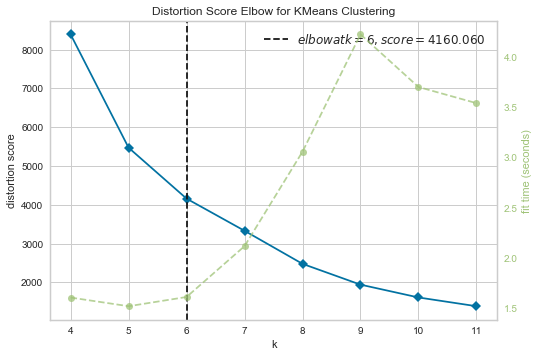

In [752]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_PCA)        # Fit the data to the visualizer
visualizer.poof(); 

In [753]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 6)
#Fit the model to the data
k_means_model.fit(X_PCA);

In [754]:
pred_labels = k_means_model.predict(X_PCA)

In [755]:
pred_labels = k_means_model.labels_

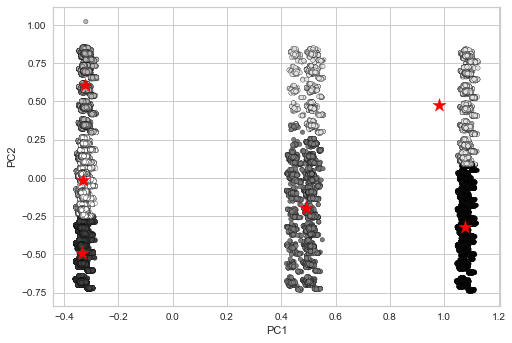

In [756]:
#Plot the data:
plt.figure()
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels, s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200,cmap='viridis')

plt.show();

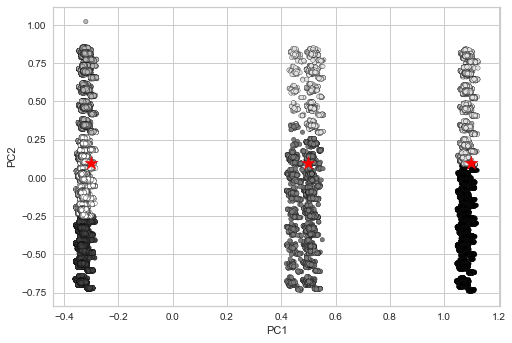

In [757]:
#Plot the data:
plt.figure()
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels, s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')

k_means_model.cluster_centers_ = np.array([[-.3     , 0.1    ],
                                           [0.5 ,  0.1],
                                           [1.1     ,  0.1   ]])
plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200,cmap='viridis' )

plt.show();

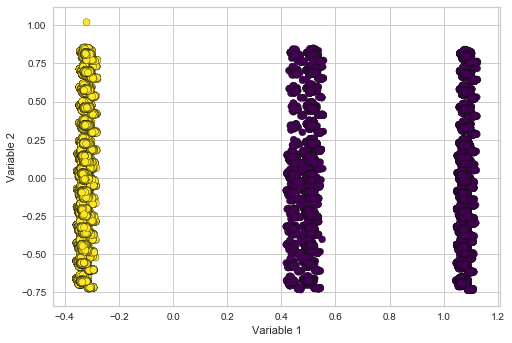

In [758]:
from sklearn.mixture import GaussianMixture

#Build and fit the model(changing the shape of the clusters)
my_gmm = GaussianMixture(n_components=2, covariance_type='full')
my_gmm.fit(X_PCA)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X_PCA)

#Plot the predictions
plt.figure()
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels_gmm, edgecolor='k',cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show();

### 2. Cluestering without  Time related columns

In [759]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.007269,0.399254,0.011724,1.0,0.800000,0.272727,0.272736,0.956522,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006859,0.379229,0.011724,1.0,0.466667,0.272727,0.272736,0.956522,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024889,0.390174,0.046806,1.0,0.333333,0.454545,0.454555,0.608696,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004912,0.420771,0.007952,1.0,0.466667,0.090909,0.090918,0.565217,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004665,0.421144,0.007952,1.0,0.300000,0.090909,0.090918,0.695652,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [760]:
df3=df1.drop([1,3,4,5,6,7], axis=1)

In [761]:
df3.head()

,0,2,8,9,10,11,12,13,14,15,...,73,74,75,76,77,78,79,80,81,82
0,0.007269,0.011724,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006859,0.011724,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024889,0.046806,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004912,0.007952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004665,0.007952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [762]:
#Build and fit a PCA model to the data
my_pca = PCA(n_components=2)
X_PCA3 = my_pca.fit_transform(df3)


In [763]:
my_pca.explained_variance_ratio_

array([0.23631374, 0.0726553 ])

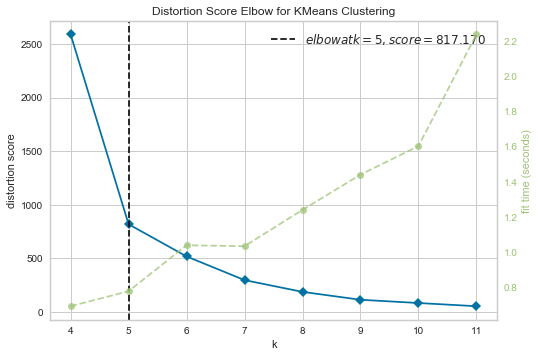

In [764]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_PCA3)        # Fit the data to the visualizer
visualizer.poof(); 

In [765]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 5)
#Fit the model to the data
k_means_model.fit(X_PCA3);

In [766]:
pred_labels = k_means_model.predict(X_PCA3)

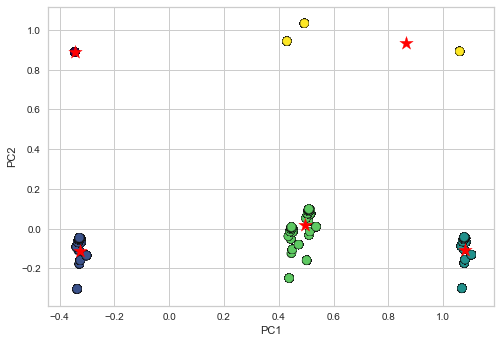

In [767]:
#Plot the data:
plt.figure()
plt.scatter(X_PCA3[:,0], X_PCA3[:,1], c=pred_labels, s=75, edgecolor='k',cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200)

plt.show();

In [768]:
my_pca.explained_variance_ratio_

array([0.23631374, 0.0726553 ])

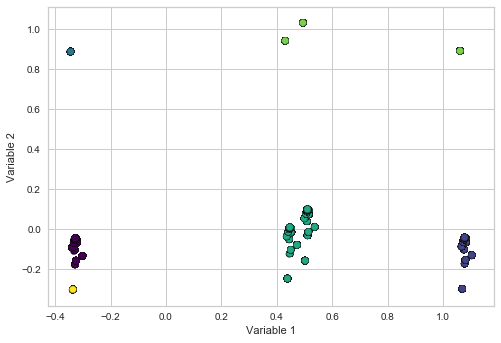

In [769]:
from sklearn.mixture import GaussianMixture

#Build and fit the model(changing the shape of the clusters)
my_gmm = GaussianMixture(n_components=6, covariance_type='full')
my_gmm.fit(X_PCA3)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X_PCA3)

#Plot the predictions
plt.figure()
plt.scatter(X_PCA3[:,0], X_PCA3[:,1], c=pred_labels_gmm, edgecolor='k',cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show();

### 3. Without payment type

In [770]:
df4=df3.drop([8,9,10,11], axis=1)

In [771]:
#Build and fit a PCA model to the data
my_pca = PCA(n_components=2)
X_PCA4 = my_pca.fit_transform(df4)

In [772]:
my_pca.explained_variance_ratio_

array([0.10408379, 0.08814076])

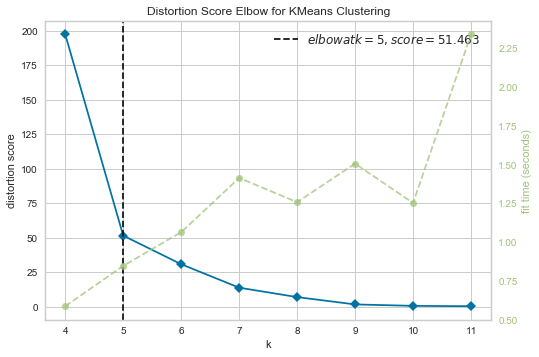

In [773]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_PCA4)        # Fit the data to the visualizer
visualizer.poof(); 

In [774]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 5)
#Fit the model to the data
k_means_model.fit(X_PCA4);

In [775]:
pred_labels = k_means_model.predict(X_PCA4)

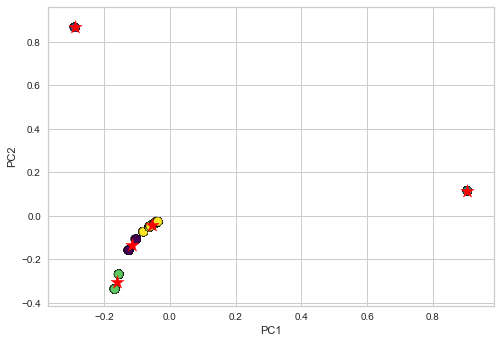

In [776]:
#Plot the data:
plt.figure()
plt.scatter(X_PCA4[:,0], X_PCA4[:,1], c=pred_labels, s=75, edgecolor='k',cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200)

plt.show();

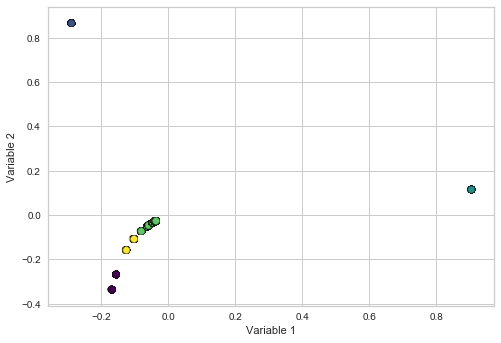

In [777]:
from sklearn.mixture import GaussianMixture

#Build and fit the model(changing the shape of the clusters)
my_gmm = GaussianMixture(n_components=5, covariance_type='full')
my_gmm.fit(X_PCA4)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X_PCA4)

#Plot the predictions
plt.figure()
plt.scatter(X_PCA4[:,0], X_PCA4[:,1], c=pred_labels_gmm, edgecolor='k',cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show();

### 4. Without payment installments values

In [778]:
df5=df4.drop(0,axis=1)

In [779]:
#Build and fit a PCA model to the data
my_pca = PCA(n_components=2)
X_PCA5 = my_pca.fit_transform(df5)

In [780]:
my_pca.explained_variance_ratio_

array([0.10412529, 0.08817615])

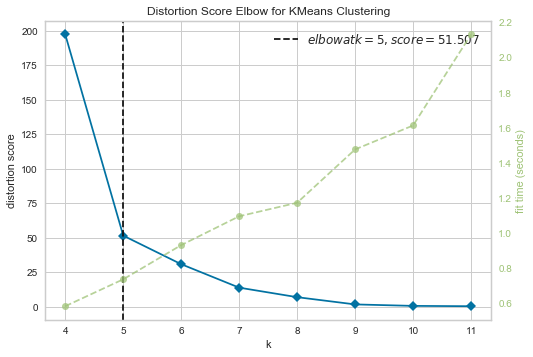

In [781]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_PCA5)        # Fit the data to the visualizer
visualizer.poof(); 

In [782]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 5)
#Fit the model to the data
k_means_model.fit(X_PCA5);

In [783]:
pred_labels = k_means_model.predict(X_PCA5)

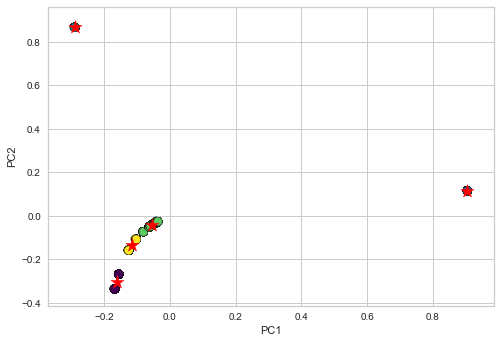

In [784]:
#Plot the data:
plt.figure()
plt.scatter(X_PCA5[:,0], X_PCA5[:,1], c=pred_labels, s=75, edgecolor='k',cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200)

plt.show();

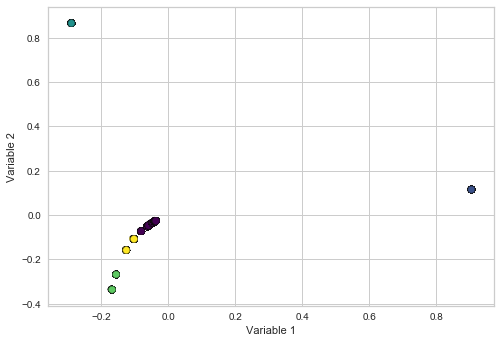

In [785]:
from sklearn.mixture import GaussianMixture

#Build and fit the model(changing the shape of the clusters)
my_gmm = GaussianMixture(n_components=5, covariance_type='full')
my_gmm.fit(X_PCA5)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X_PCA5)

#Plot the predictions
plt.figure()
plt.scatter(X_PCA5[:,0], X_PCA5[:,1], c=pred_labels_gmm, edgecolor='k',cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show();

### 5. Combining Payment values and number of purchase:  Groupby Month

In [786]:
df_pay_month=df[df['order_purchase_year']>2016].groupby('order_purchase_month').agg({'payment_value':sum,'customer_unique_id':'count'})

In [787]:
df_pay_month.head(12)

,payment_value,customer_unique_id
order_purchase_month,,
1,1514705.84,9107
2,1574712.94,9533
3,1908781.02,11213
4,1900468.44,10663
5,2159569.29,12209
6,1859533.65,10919
7,2004461.22,11756
8,2040059.83,12288
9,985552.70,4923


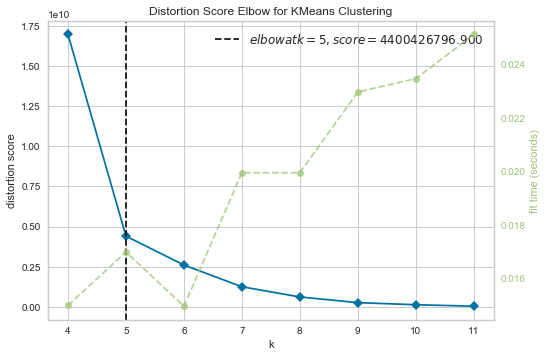

In [788]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_pay_month)        # Fit the data to the visualizer
visualizer.poof(); 

In [789]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 5)
#Fit the model to the data
k_means_model.fit(df_pay_month);

In [790]:
pred_labels = k_means_model.predict(df_pay_month)

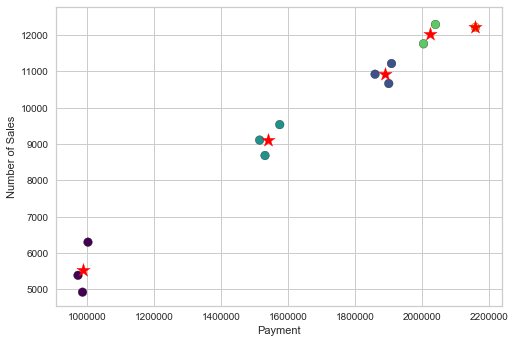

In [791]:
#Plot the data:
plt.figure()
plt.scatter(df_pay_month.iloc[:,0], df_pay_month.iloc[:,1], c=pred_labels, s=75, edgecolor='k',cmap='viridis')
plt.xlabel('Payment')
plt.ylabel('Number of Sales')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200)

plt.show();

### 6. Combining Payment values and number of purchase:  Groupby Month-Year

In [792]:
df_pay_month=df.groupby(by='order_purchase_month_year').agg({'payment_value':sum,'customer_unique_id':'count'})

In [793]:
df_pay_month.head(12)

,payment_value,customer_unique_id
order_purchase_month_year,,
102016,61587.17,329
102017,972010.21,5386
112017,1530815.84,8683
12017,172073.77,946
12018,1342632.07,8161
122016,19.62,1
122017,1001835.60,6299
22017,312558.54,1889
22018,1262154.40,7644


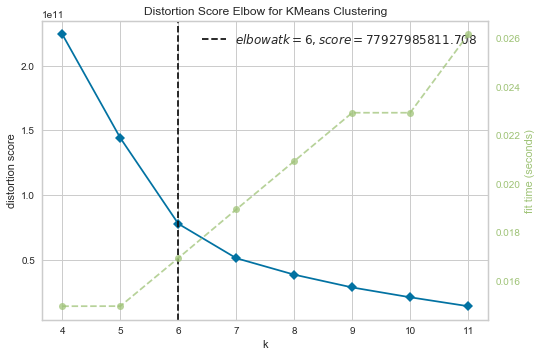

In [794]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_pay_month)        # Fit the data to the visualizer
visualizer.poof(); 

In [795]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 6)
#Fit the model to the data
k_means_model.fit(df_pay_month);

In [796]:
pred_labels = k_means_model.predict(df_pay_month)

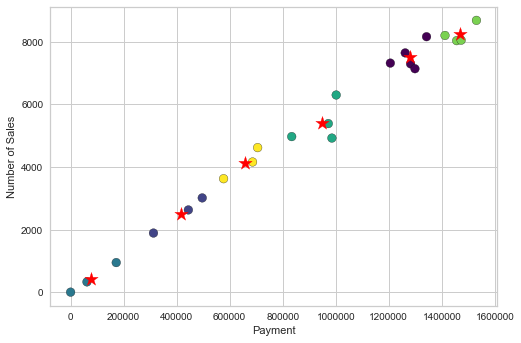

In [797]:
#Plot the data:
plt.figure()
plt.scatter(df_pay_month.iloc[:,0], df_pay_month.iloc[:,1], c=pred_labels, s=75, edgecolor='k',cmap='viridis')
plt.xlabel('Payment')
plt.ylabel('Number of Sales')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200)

plt.show();

### 7. Combining Sales revenue and number of sales grouping by product type

In [798]:
df_pay_category=df.groupby(by='product_category_name_english').agg({'payment_value':sum,'customer_unique_id':'count'})

In [799]:
df_pay_category.head(3)

,payment_value,customer_unique_id
product_category_name_english,,
agro_industry_and_commerce,115632.24,246
air_conditioning,88849.72,294
art,28498.45,207


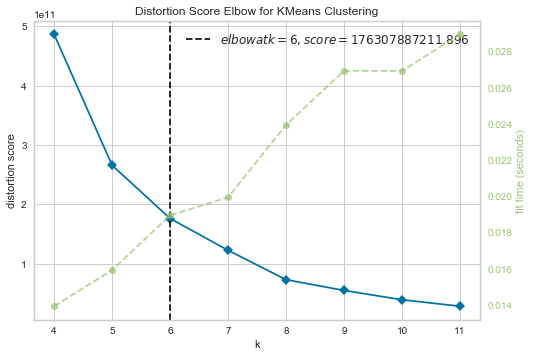

In [800]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_pay_category)        # Fit the data to the visualizer
visualizer.poof(); 

In [801]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 6)
#Fit the model to the data
k_means_model.fit(df_pay_category);

In [802]:
pred_labels = k_means_model.predict(df_pay_category)

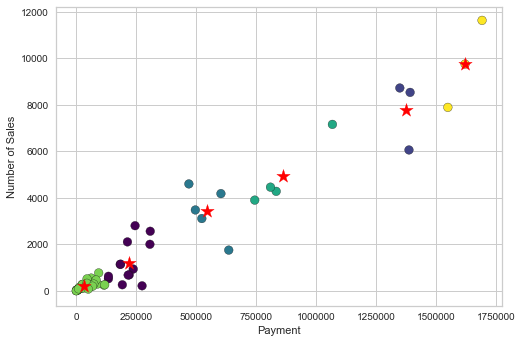

In [803]:
#Plot the data:
plt.figure()
plt.scatter(df_pay_category.iloc[:,0], df_pay_category.iloc[:,1], c=pred_labels, s=75, edgecolor='k',cmap='viridis')
plt.xlabel('Payment')
plt.ylabel('Number of Sales')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200)

plt.show();

### 8. Combining Sales revenue and time of the day grouping by product type

In [804]:
df_pay_category_hour=df.groupby(by=['product_category_name_english','order_purchase_hour']).agg({'payment_value':sum,'customer_unique_id':'count'})

In [805]:
df_pch=df_pay_category_hour.reset_index()

In [806]:
df_pch.head(3)

,product_category_name_english,order_purchase_hour,payment_value,customer_unique_id
0,agro_industry_and_commerce,0,2558.89,18
1,agro_industry_and_commerce,2,39.77,1
2,agro_industry_and_commerce,4,48.83,1


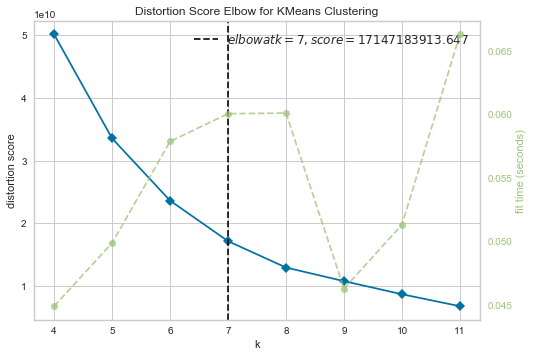

In [807]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_pch.iloc[:,1:3])        # Fit the data to the visualizer
visualizer.poof(); 

In [808]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 7)
#Fit the model to the data
k_means_model.fit(df_pch.iloc[:,1:3]);

In [809]:
pred_labels = k_means_model.predict(df_pch.iloc[:,1:3])

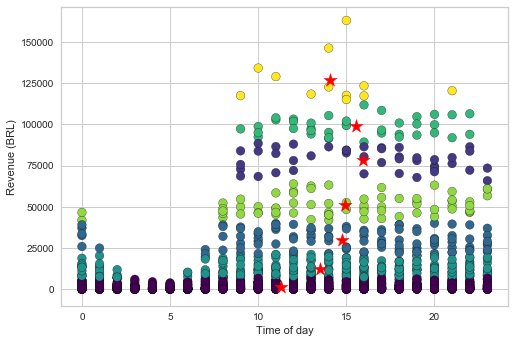

In [810]:
df_pch_plot=df_pch.iloc[:,1:3]
#Plot the data:
plt.figure()
plt.scatter(df_pch_plot.iloc[:,0], df_pch_plot.iloc[:,1], c=pred_labels, s=75, edgecolor='k',cmap='viridis')
plt.xlabel('Time of day')
plt.ylabel('Revenue (BRL)')

plt.scatter(k_means_model.cluster_centers_[:, 0],k_means_model.cluster_centers_[:, 1], c='red',marker="*",s=200)

plt.show();

### 9. Clustering on period of the day

In [811]:
#creating a range for time of the day
from sys import stdout

def get_part_of_day(hour):
    return (
        "1-2h" if 0 <= hour <= 2
        else
        "3-5h" if 3 <= hour <= 5
        else
        "6-8h" if 6 <= hour <= 8
        else
        "9-11h" if 9 <= hour <= 11
        else
        "12-14h" if 12 <= hour <= 14
        else
        "15-17h" if 15 <= hour <= 17
        else
        "18-20h" if 18 <= hour <= 20
        else
        "21-23h"
    )

In [812]:
dayperiod=[]
for value in df['order_purchase_hour'].values:
    result=get_part_of_day(value)
    dayperiod.append(result)


In [813]:
df['time_of_day']=pd.DataFrame(dayperiod)

In [814]:
df.head(3)

,customer_unique_id,payment_type,payment_value,order_delivery_time,price,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year,product_category_name_english,order_purchase_hour,time_of_day
0,708ab75d2a007f0564aedd11139c7708,credit_card,99.33,-12.291667,79.80,2018,25,4,42018,home_construction,22,21-23h
1,550a1a0e8ad53e4147e6c761b5699c2b,credit_card,93.72,-19.000000,79.80,2018,15,4,42018,home_construction,22,21-23h
2,55020cb68ae358a51969695657a54e9c,credit_card,340.08,-15.333333,316.05,2018,11,6,62018,home_construction,14,12-14h


In [815]:
df_TOD=df.groupby(by=['product_category_name_english','time_of_day']).agg({'payment_value':sum,'customer_unique_id':'count'})

In [816]:
df_TOD=df_TOD.reset_index()

In [817]:
df_TOD.head(20)

,product_category_name_english,time_of_day,payment_value,customer_unique_id
0,agro_industry_and_commerce,1-2h,2598.66,19
1,agro_industry_and_commerce,12-14h,20470.00,46
2,agro_industry_and_commerce,15-17h,24270.98,75
3,agro_industry_and_commerce,18-20h,13487.20,37
4,agro_industry_and_commerce,21-23h,7140.39,24
5,agro_industry_and_commerce,3-5h,48.83,1
6,agro_industry_and_commerce,6-8h,2664.35,10
7,agro_industry_and_commerce,9-11h,44951.83,34
8,air_conditioning,1-2h,2374.32,10
9,air_conditioning,12-14h,28172.39,63


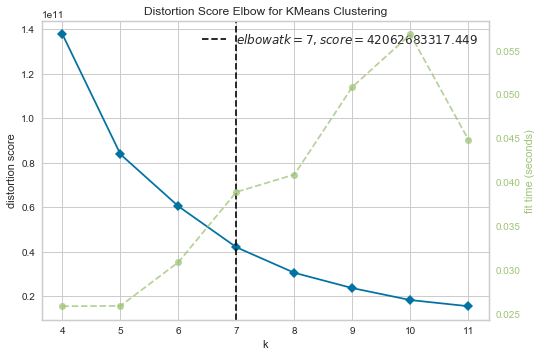

In [818]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_TOD.iloc[:,2:])        # Fit the data to the visualizer
visualizer.poof(); 

In [819]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 7)
#Fit the model to the data
k_means_model.fit(df_TOD.iloc[:,2:]);

In [820]:
pred_labels = k_means_model.predict(df_TOD.iloc[:,2:])

In [821]:
df_temp=pd.DataFrame(list(["1-2h","3-5h" ,"6-8h","9-11h","12-14h","15-17h","18-20h","21-23h"]))

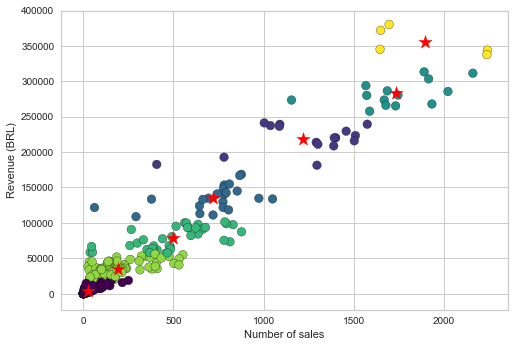

In [822]:
df_TOD_plot=df_TOD.iloc[:,2:]
#Plot the data:
plt.figure()
plt.scatter(df_TOD_plot.iloc[:,1], df_TOD_plot.iloc[:,0], c=pred_labels, s=75 ,edgecolor='k',cmap='viridis')
plt.xlabel('Number of sales')
plt.ylabel('Revenue (BRL)')

plt.scatter(k_means_model.cluster_centers_[:, 1],k_means_model.cluster_centers_[:, 0], c='red',marker="*",s=200)

plt.show();

In [823]:
df.head(3)

,customer_unique_id,payment_type,payment_value,order_delivery_time,price,order_purchase_year,order_purchase_day,order_purchase_month,order_purchase_month_year,product_category_name_english,order_purchase_hour,time_of_day
0,708ab75d2a007f0564aedd11139c7708,credit_card,99.33,-12.291667,79.80,2018,25,4,42018,home_construction,22,21-23h
1,550a1a0e8ad53e4147e6c761b5699c2b,credit_card,93.72,-19.000000,79.80,2018,15,4,42018,home_construction,22,21-23h
2,55020cb68ae358a51969695657a54e9c,credit_card,340.08,-15.333333,316.05,2018,11,6,62018,home_construction,14,12-14h


In [824]:
df_new=df.groupby(by=['order_purchase_month', 'order_purchase_day']).agg({'payment_value':sum})

In [825]:
df_new=df_new.reset_index()

In [826]:
df_new_transpose = df_new.pivot( 'order_purchase_day', 'order_purchase_month',"payment_value")

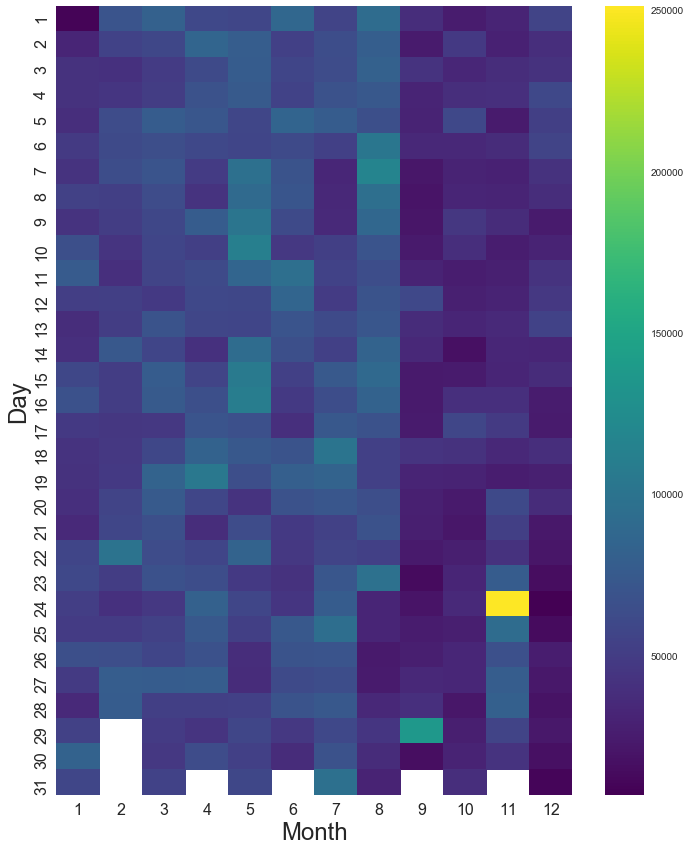

In [827]:
import seaborn as sn

plt.figure(figsize=(10,12)) 
ax=sn.heatmap(df_new_transpose, cmap='viridis',cbar_kws={"orientation": "vertical"})

plt.xlabel('Month',fontsize=24 )
plt.ylabel('Day',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

plt.show();

## 4. Conclusions:
- Dimensionality reduction (n=2) could only explain 30% of the variation.
- There is a clear difference in sales performance whenever comparing total sales over the months.
- There is a clear difference in sales performance whenever comparing total sales over the months at different years.
- Although most categories have very similar performances over the year, there are some that really outperform during some times of the year(for example, during black friday).